### Now I will try to train an accurate model that can estimate value of an apartment in Warsaw. My data comes from ``eda.ipynb``. 

##### I will try multiple different algorithms and techniques in order to determine which one is the best in this scenario

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [56]:
cat_data = ["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

sns.set_theme(style='darkgrid', 
              palette=cat_data, 
              rc={"figure.dpi":600, 'savefig.dpi':600, 
                  "axes.spines.right": False, "axes.spines.top": False, 
                  'figure.figsize':(5,3.4), 'xtick.labelsize': 7.0, 'ytick.labelsize': 7.0
                  })

In [3]:
df = pd.read_csv('clean_df.csv')
df = df.drop('price_per_sqm', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28548 entries, 0 to 28547
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_price  28548 non-null  float64
 1   area         28548 non-null  float64
 2   rooms        28548 non-null  int64  
 3   floor        28548 non-null  float64
 4   rent         28548 non-null  float64
 5   elevator     28548 non-null  float64
 6   built        28548 non-null  float64
 7   b_type       28548 non-null  object 
 8   max_floor    28548 non-null  float64
 9   balcony      28548 non-null  float64
 10  garden       28548 non-null  float64
 11  terrace      28548 non-null  float64
 12  district     28548 non-null  object 
 13  distance     28548 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 3.0+ MB


In [4]:
X = df.drop('total_price', axis=1)
Y = df['total_price']

In [5]:
onehot_features = ['b_type', 'district']
label_features = ['rooms', 'floor', 'built', 'max_floor']
binary_features = ['elevator', 'balcony', 'garden', 'terrace']
num_features = ['distance', 'area', 'rent']

In [6]:
onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_onehot = onehot_encoder.fit_transform(X[onehot_features])
X_onehot_df = pd.DataFrame(X_onehot, columns=onehot_encoder.get_feature_names_out(onehot_features))
X = X.drop(columns=onehot_features)
X = pd.concat([X, X_onehot_df], axis=1)

In [7]:
ordinal_encoder = OrdinalEncoder()
X[label_features] = ordinal_encoder.fit_transform(X[label_features])

In [8]:
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

In [9]:
target_scaler = StandardScaler()
y_scaled = target_scaler.fit_transform(Y.values.reshape(-1, 1))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [11]:
def coef_plot(model):
    coefficients = model.coef_
    feature_names = X.columns

    features_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    features_df['Absolute Coefficient'] = features_df['Coefficient'].abs()
    features_df = features_df.sort_values(by='Absolute Coefficient', ascending=False)

    sns.barplot(x='Coefficient', y='Feature', data=features_df, hue='Feature', palette='rocket');
    plt.xlabel('Coefficient', fontsize=8);
    plt.ylabel('Feature', fontsize=8);
    plt.yticks(fontsize=4);

## Linear regression


In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347220.82304118836
MSE: 1439867772525.3062
RMSE: 1199944.903954055
R²: 0.5751430698690543


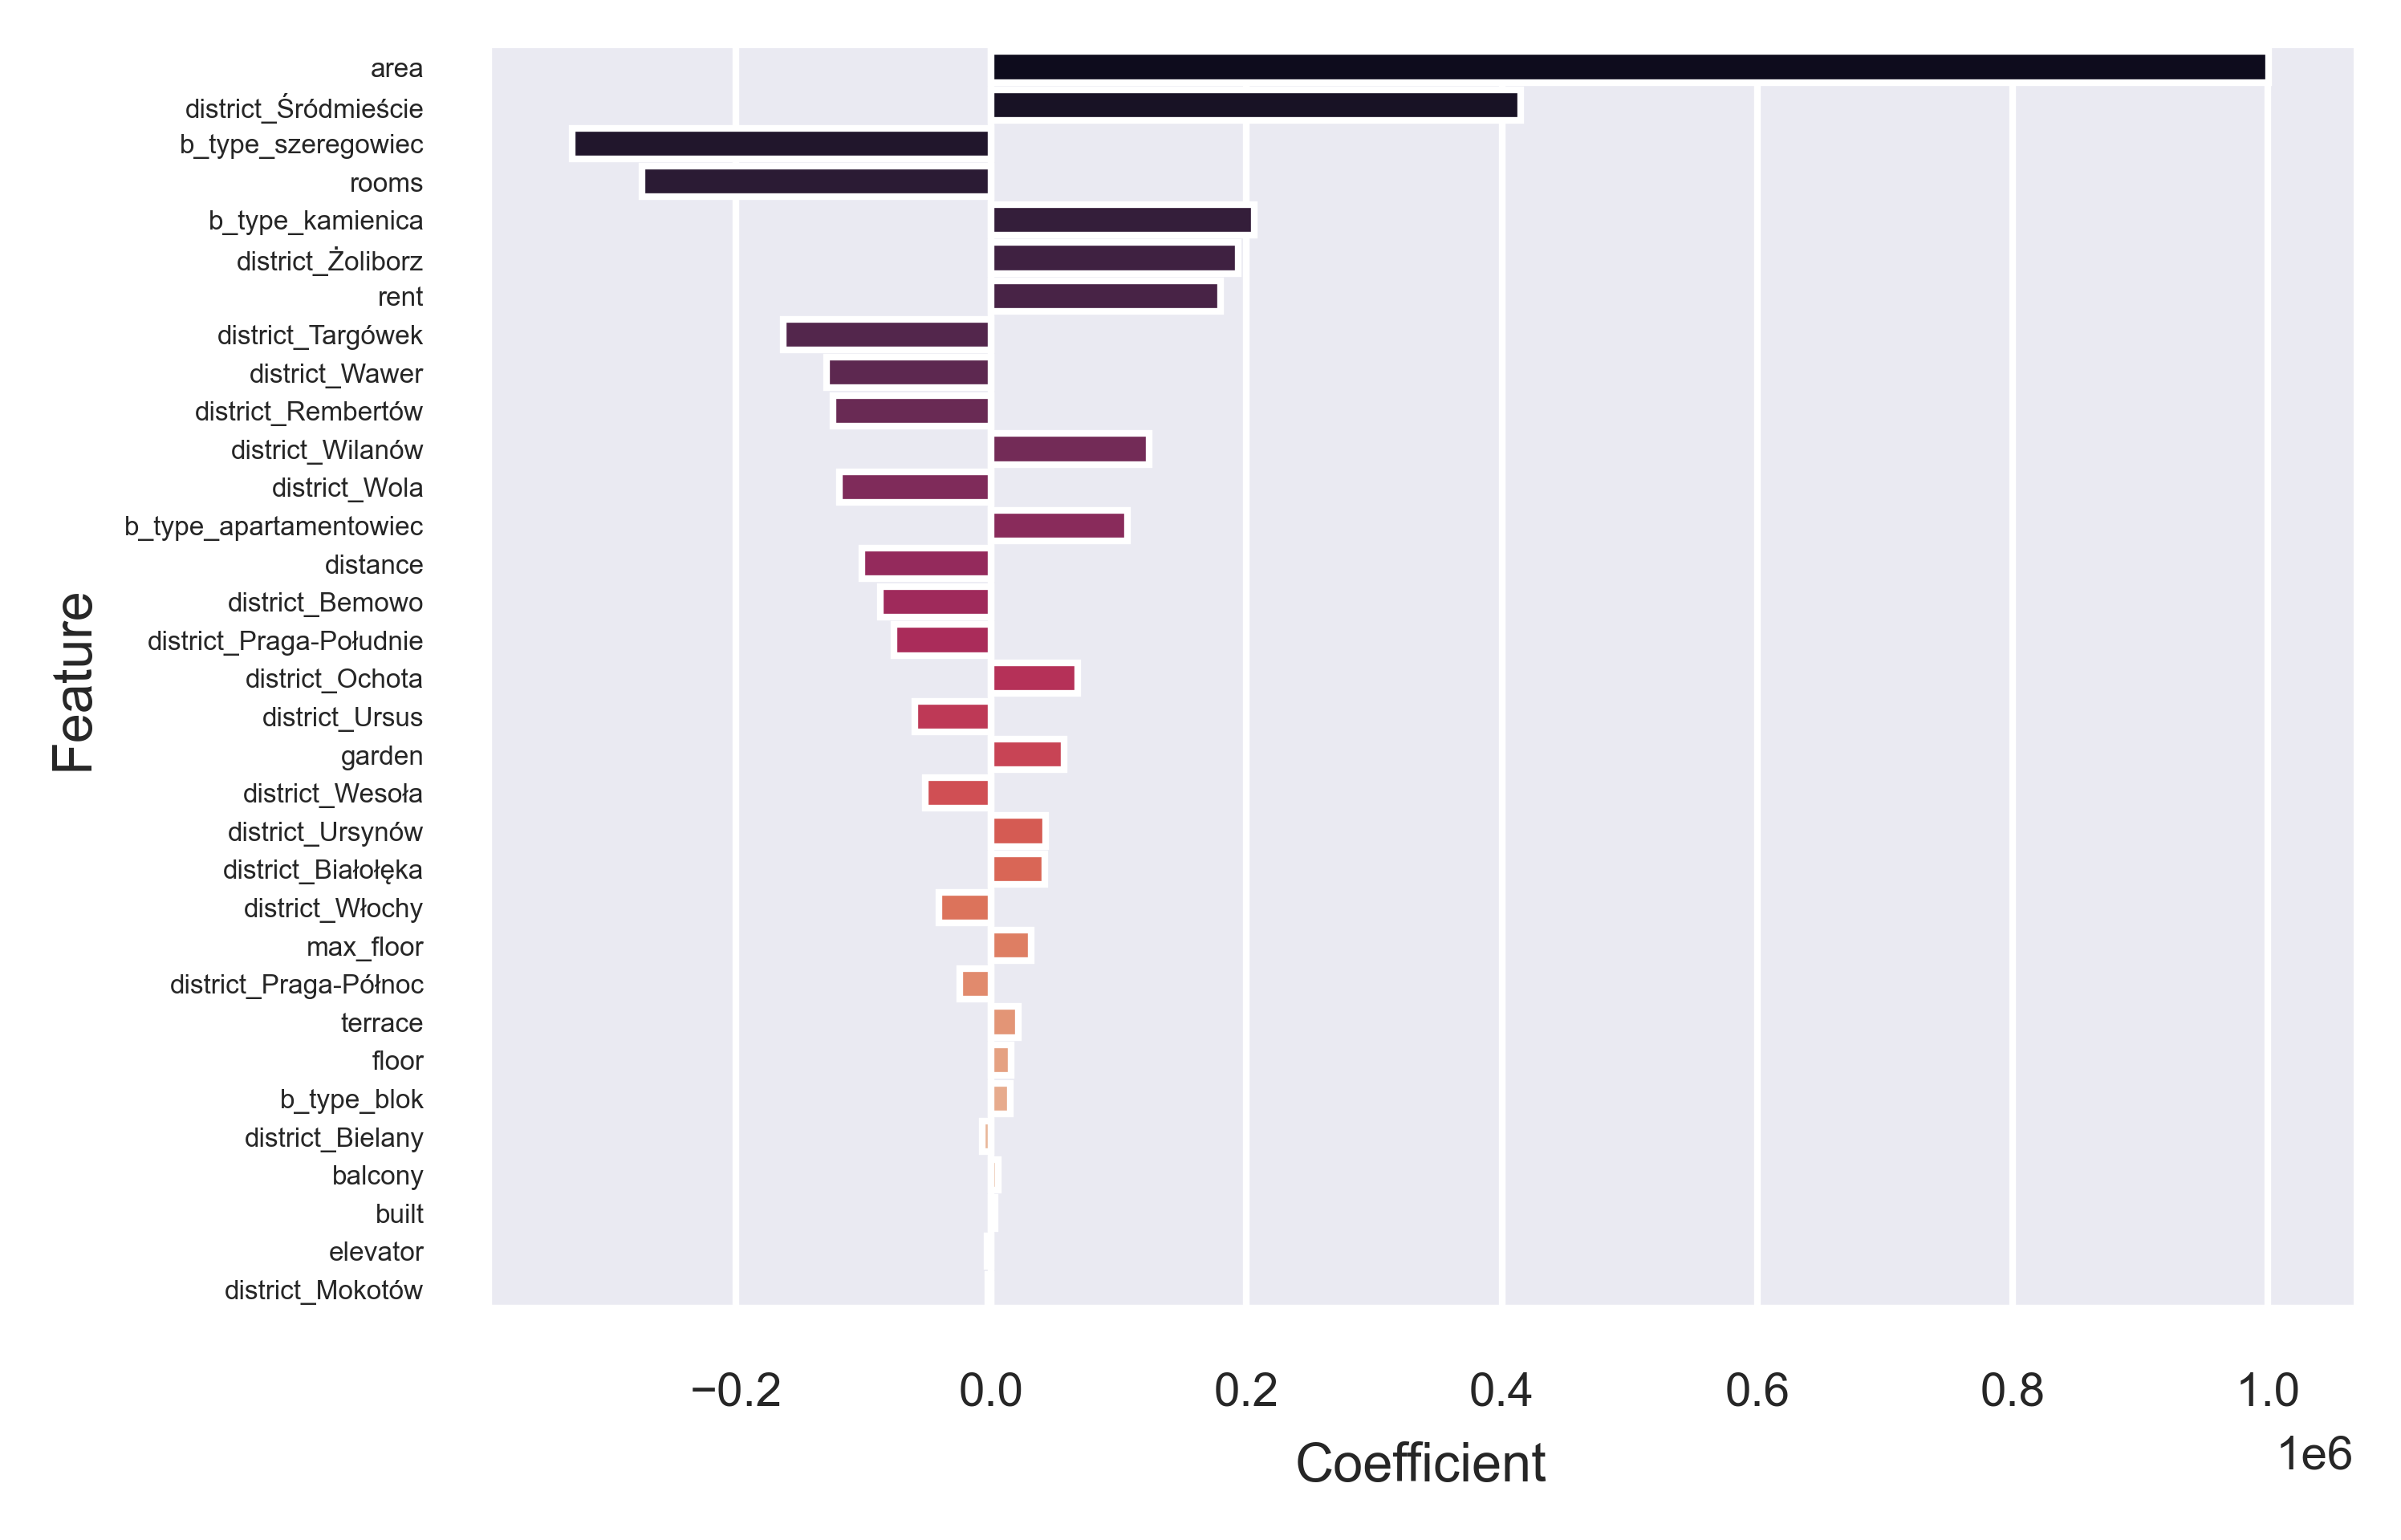

In [15]:
coef_plot(model)

## Ridge Regression

In [16]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347202.7035540169
MSE: 1439953192278.291
RMSE: 1199980.496624129
R²: 0.575117865350474


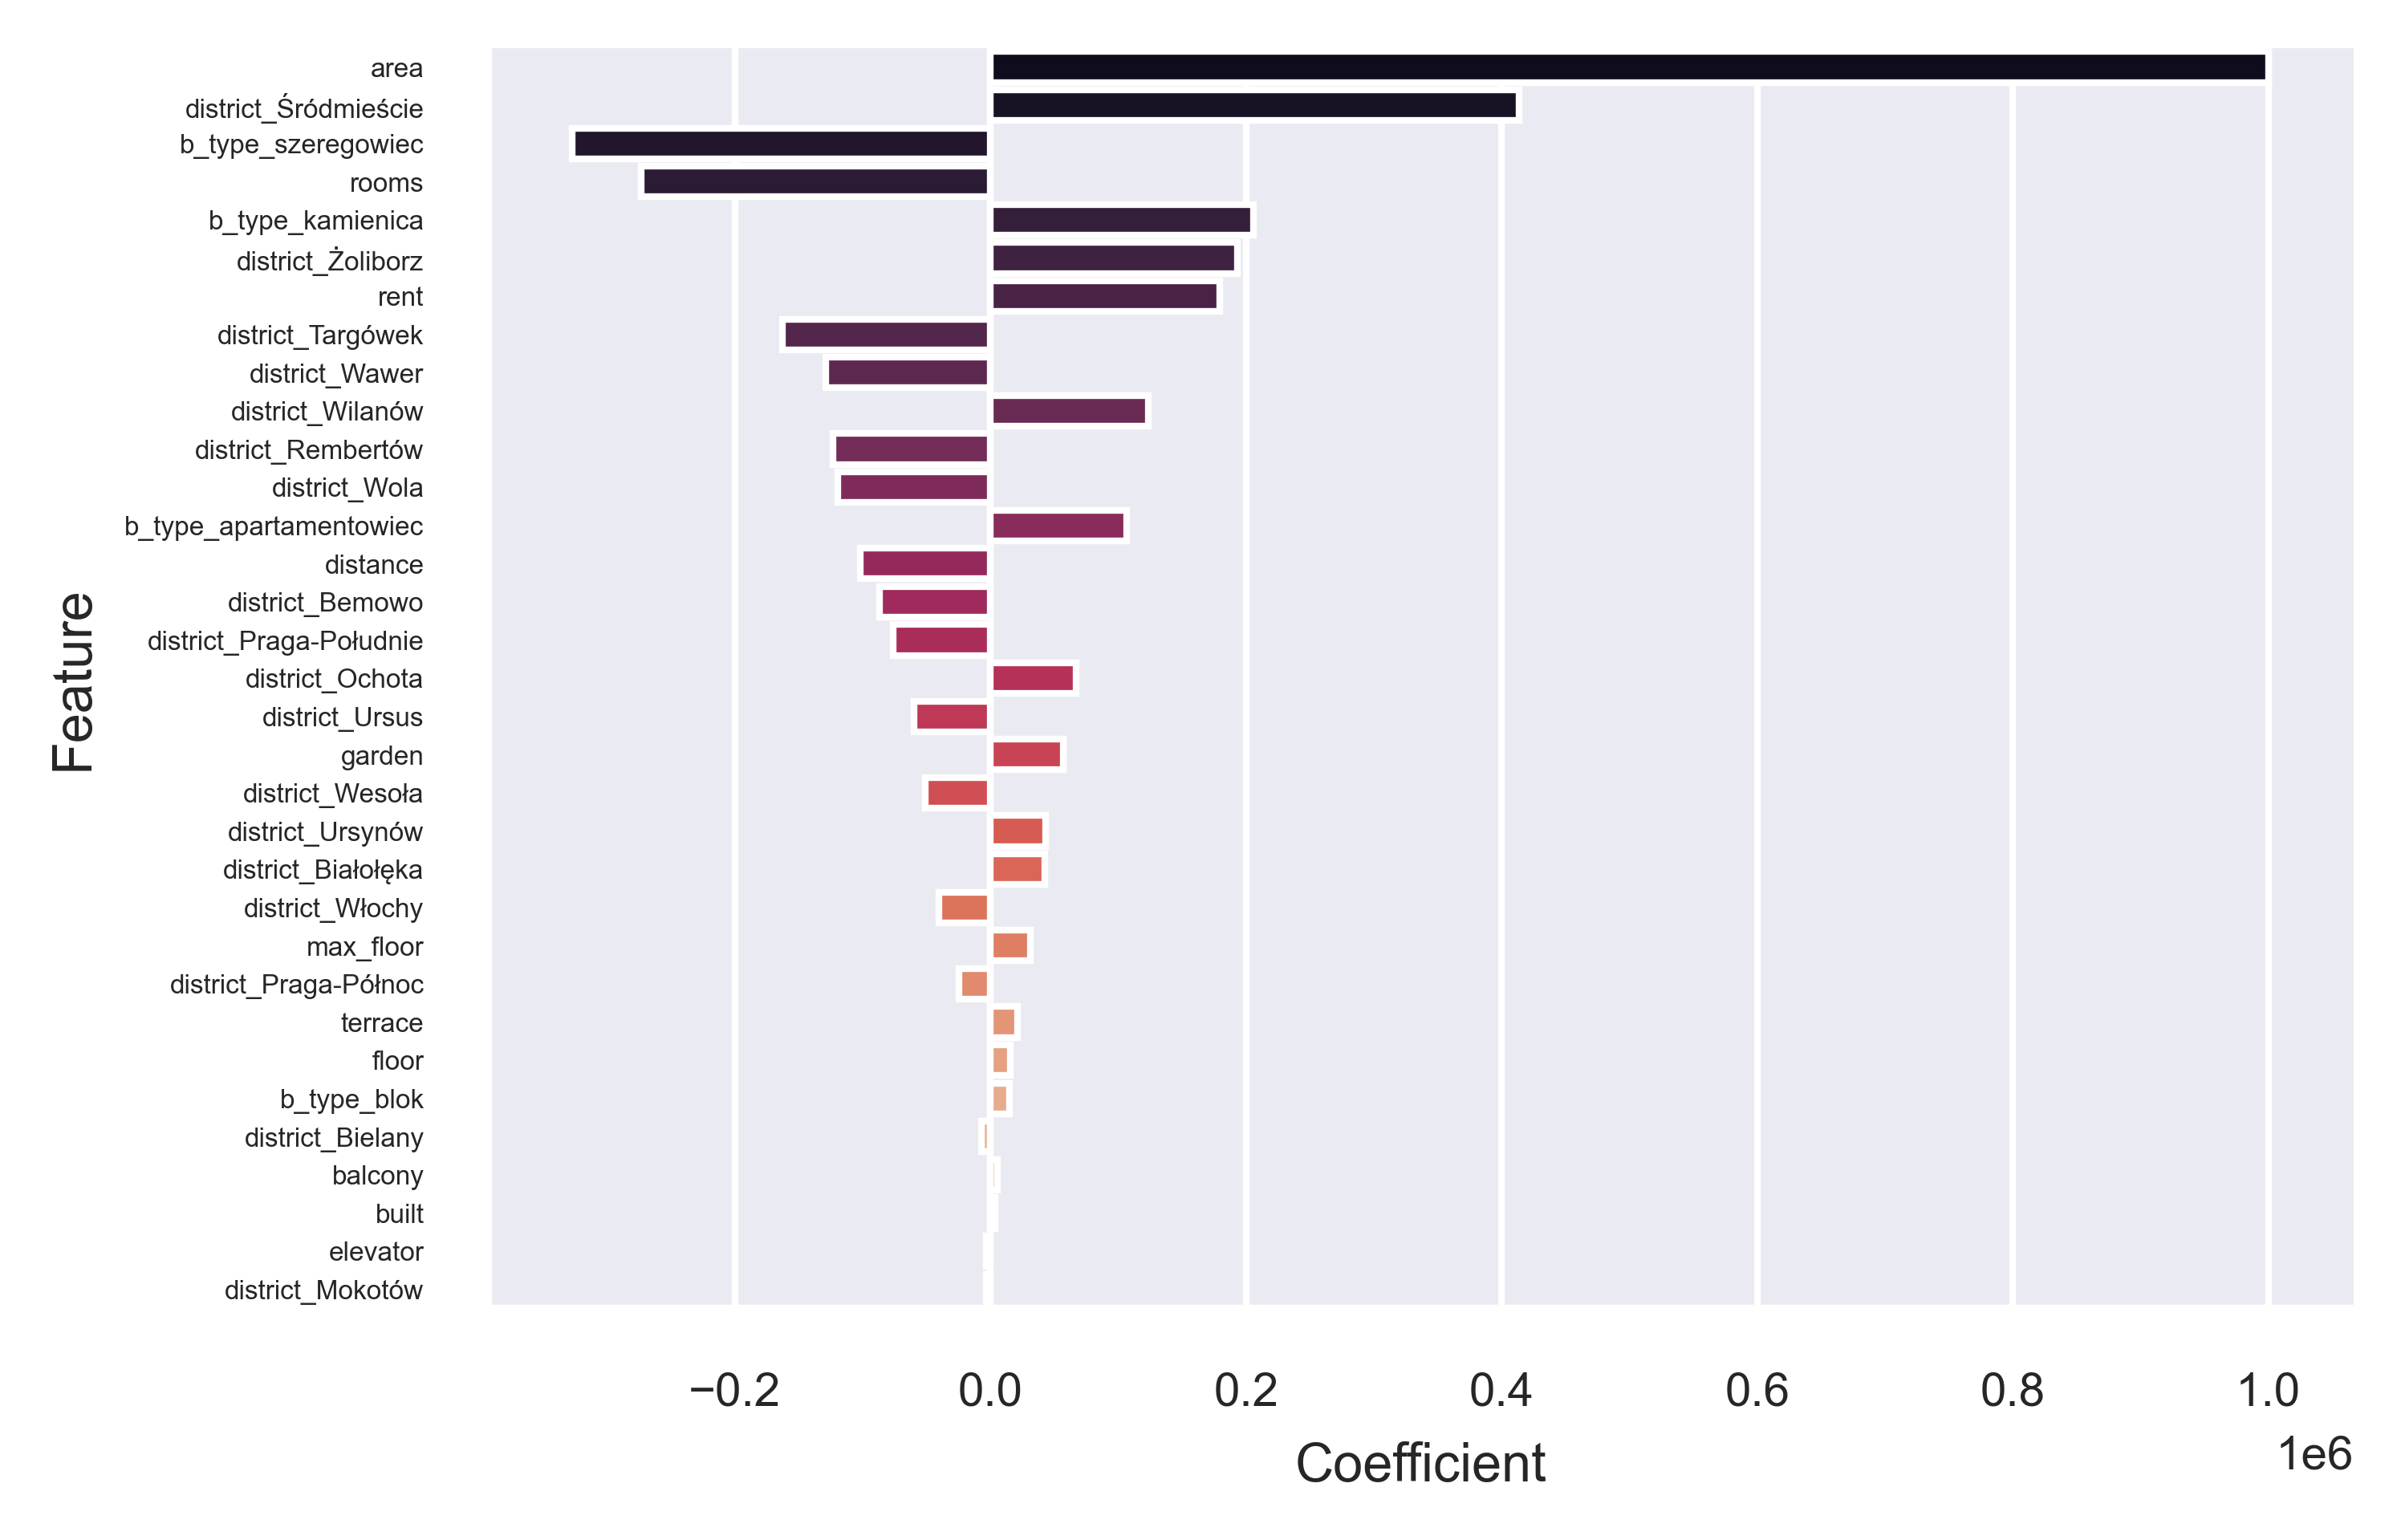

In [18]:
coef_plot(model)

In [19]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347044.37000375823
MSE: 1440722565150.6304
RMSE: 1200301.0310545561
R²: 0.574890849090436


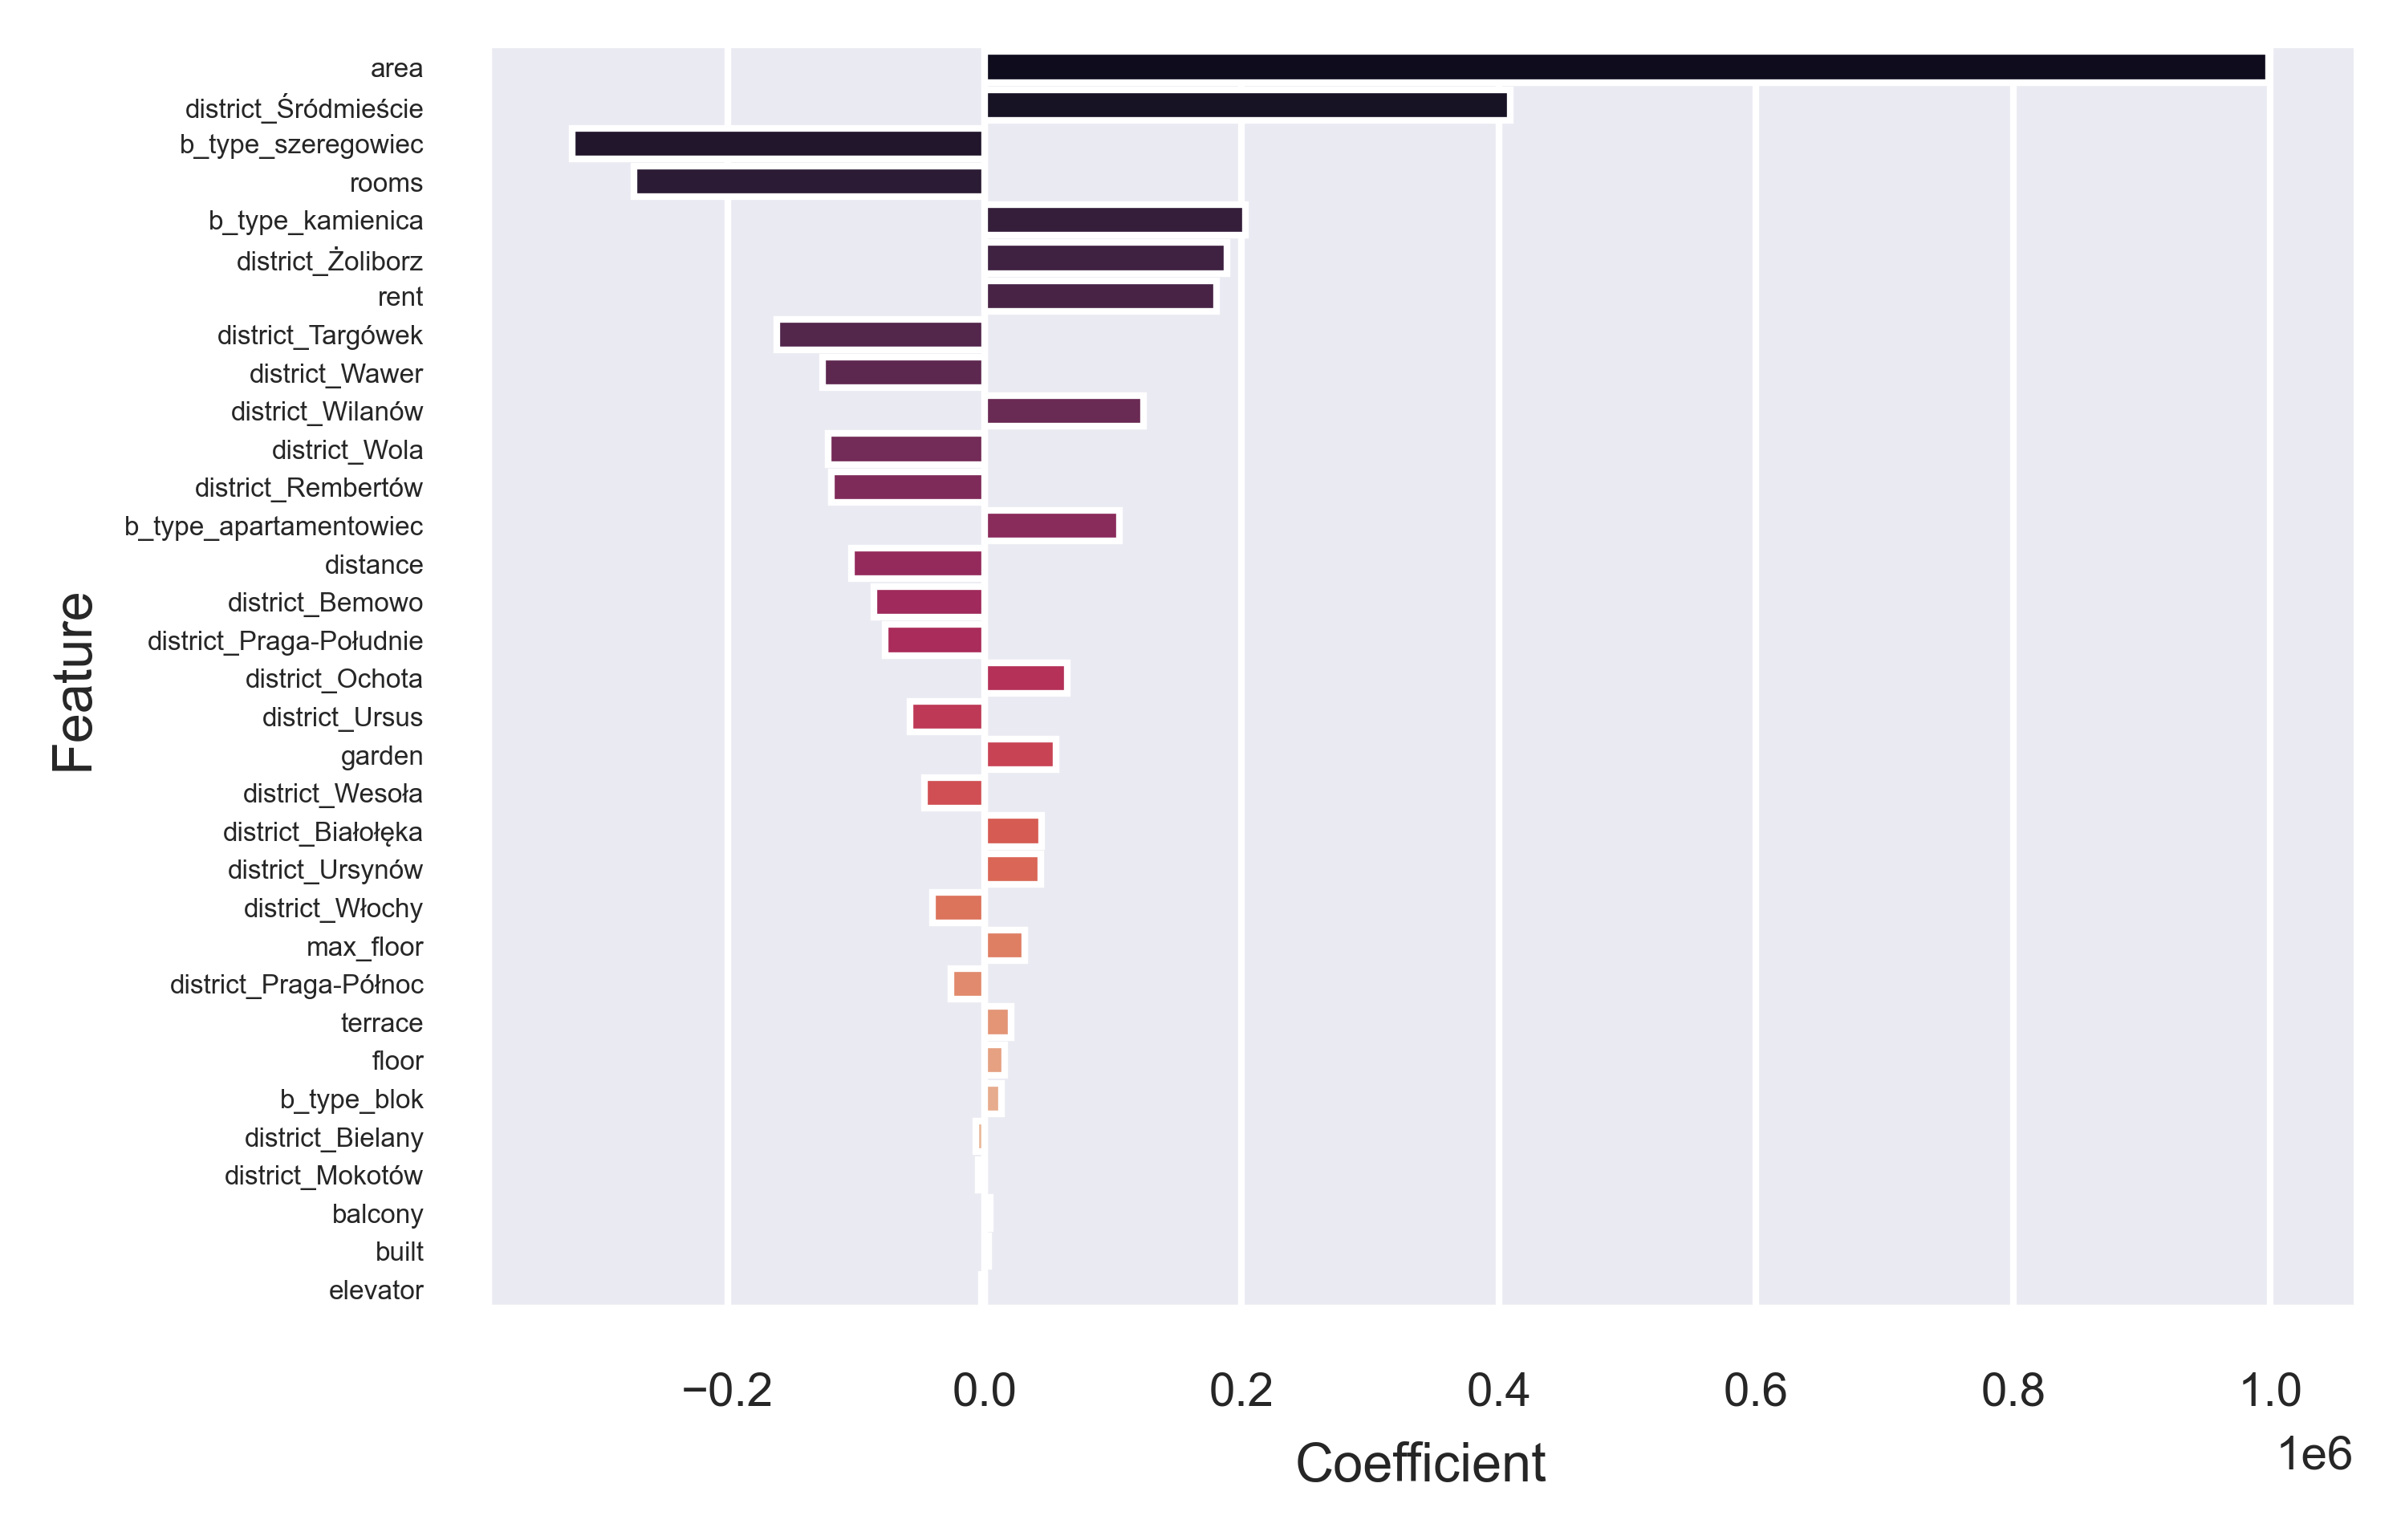

In [21]:
coef_plot(model)

## Lasso Regression

In [22]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1, max_iter=1000)
model.fit(X_train, y_train);
y_pred = model.predict(X_test)

/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.898e+15, tolerance: 3.447e+12
  model = cd_fast.enet_coordinate_descent(


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347220.2448859125
MSE: 1439872041041.3164
RMSE: 1199946.6825827372
R²: 0.5751418103724235


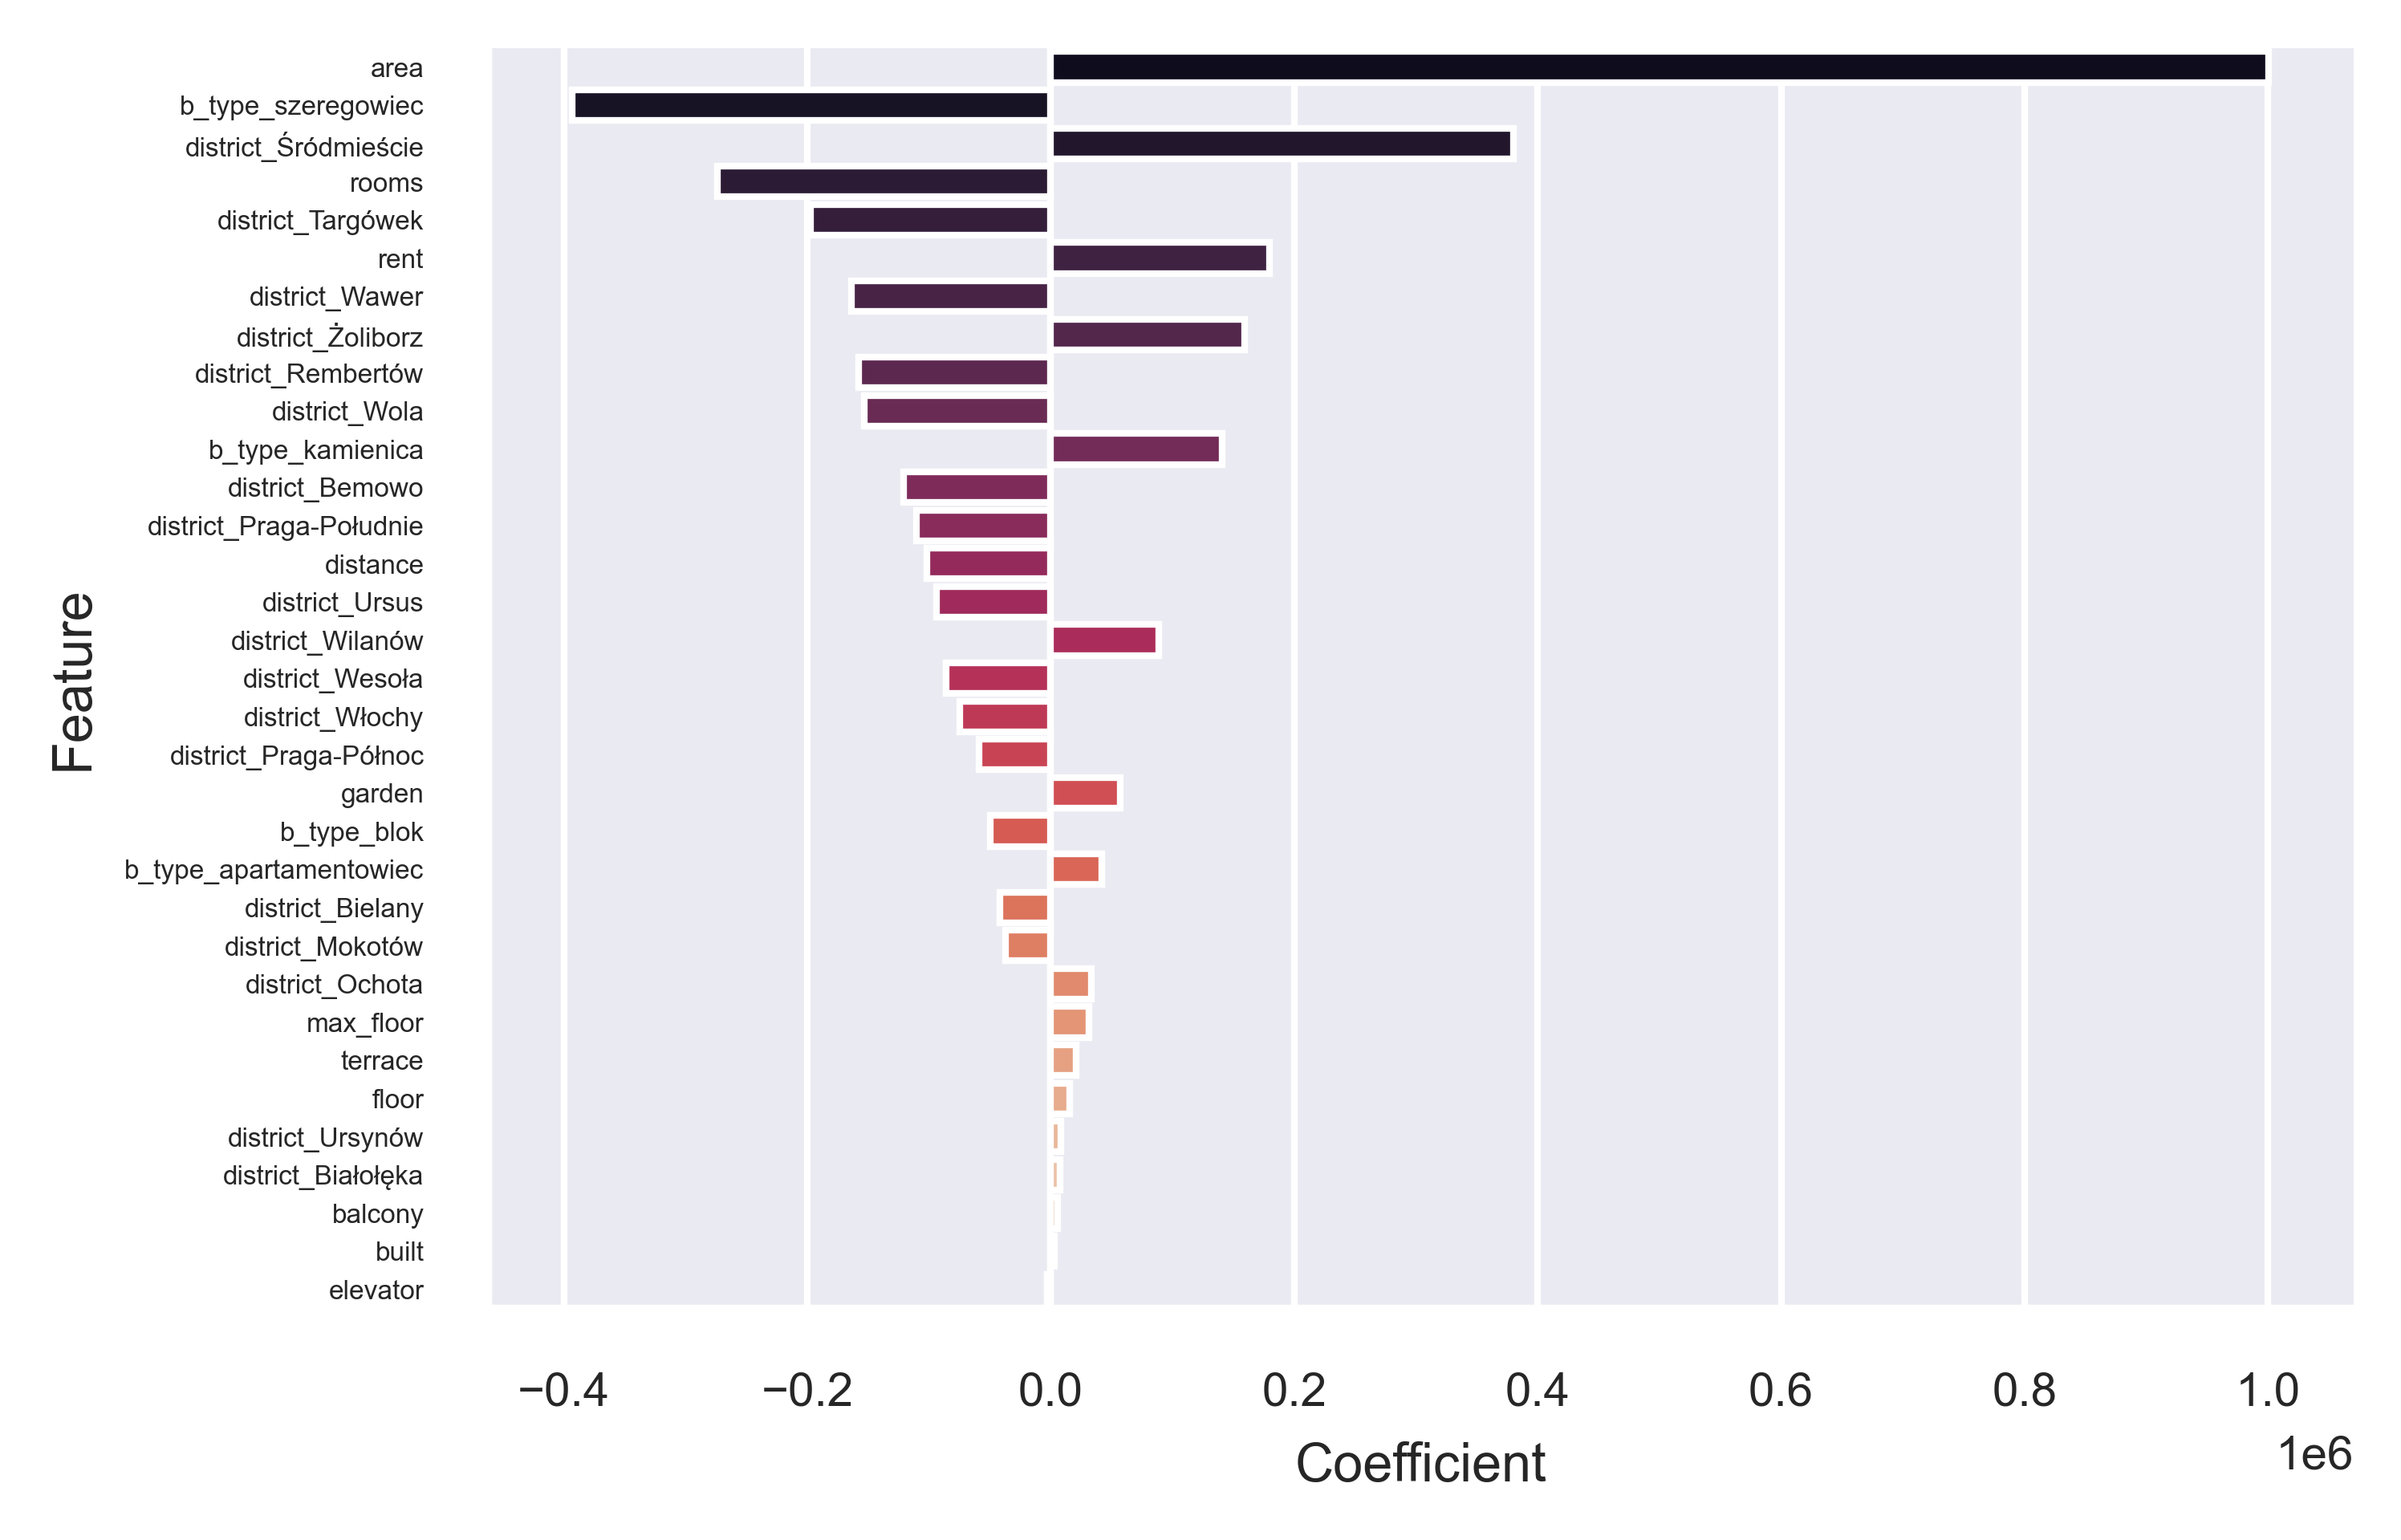

In [24]:
coef_plot(model)

In [25]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.938e+14, tolerance: 2.719e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.630e+14, tolerance: 2.647e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did no

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347213.0095214781
MSE: 1439905894497.814
RMSE: 1199960.7887334544
R²: 0.575131821347128


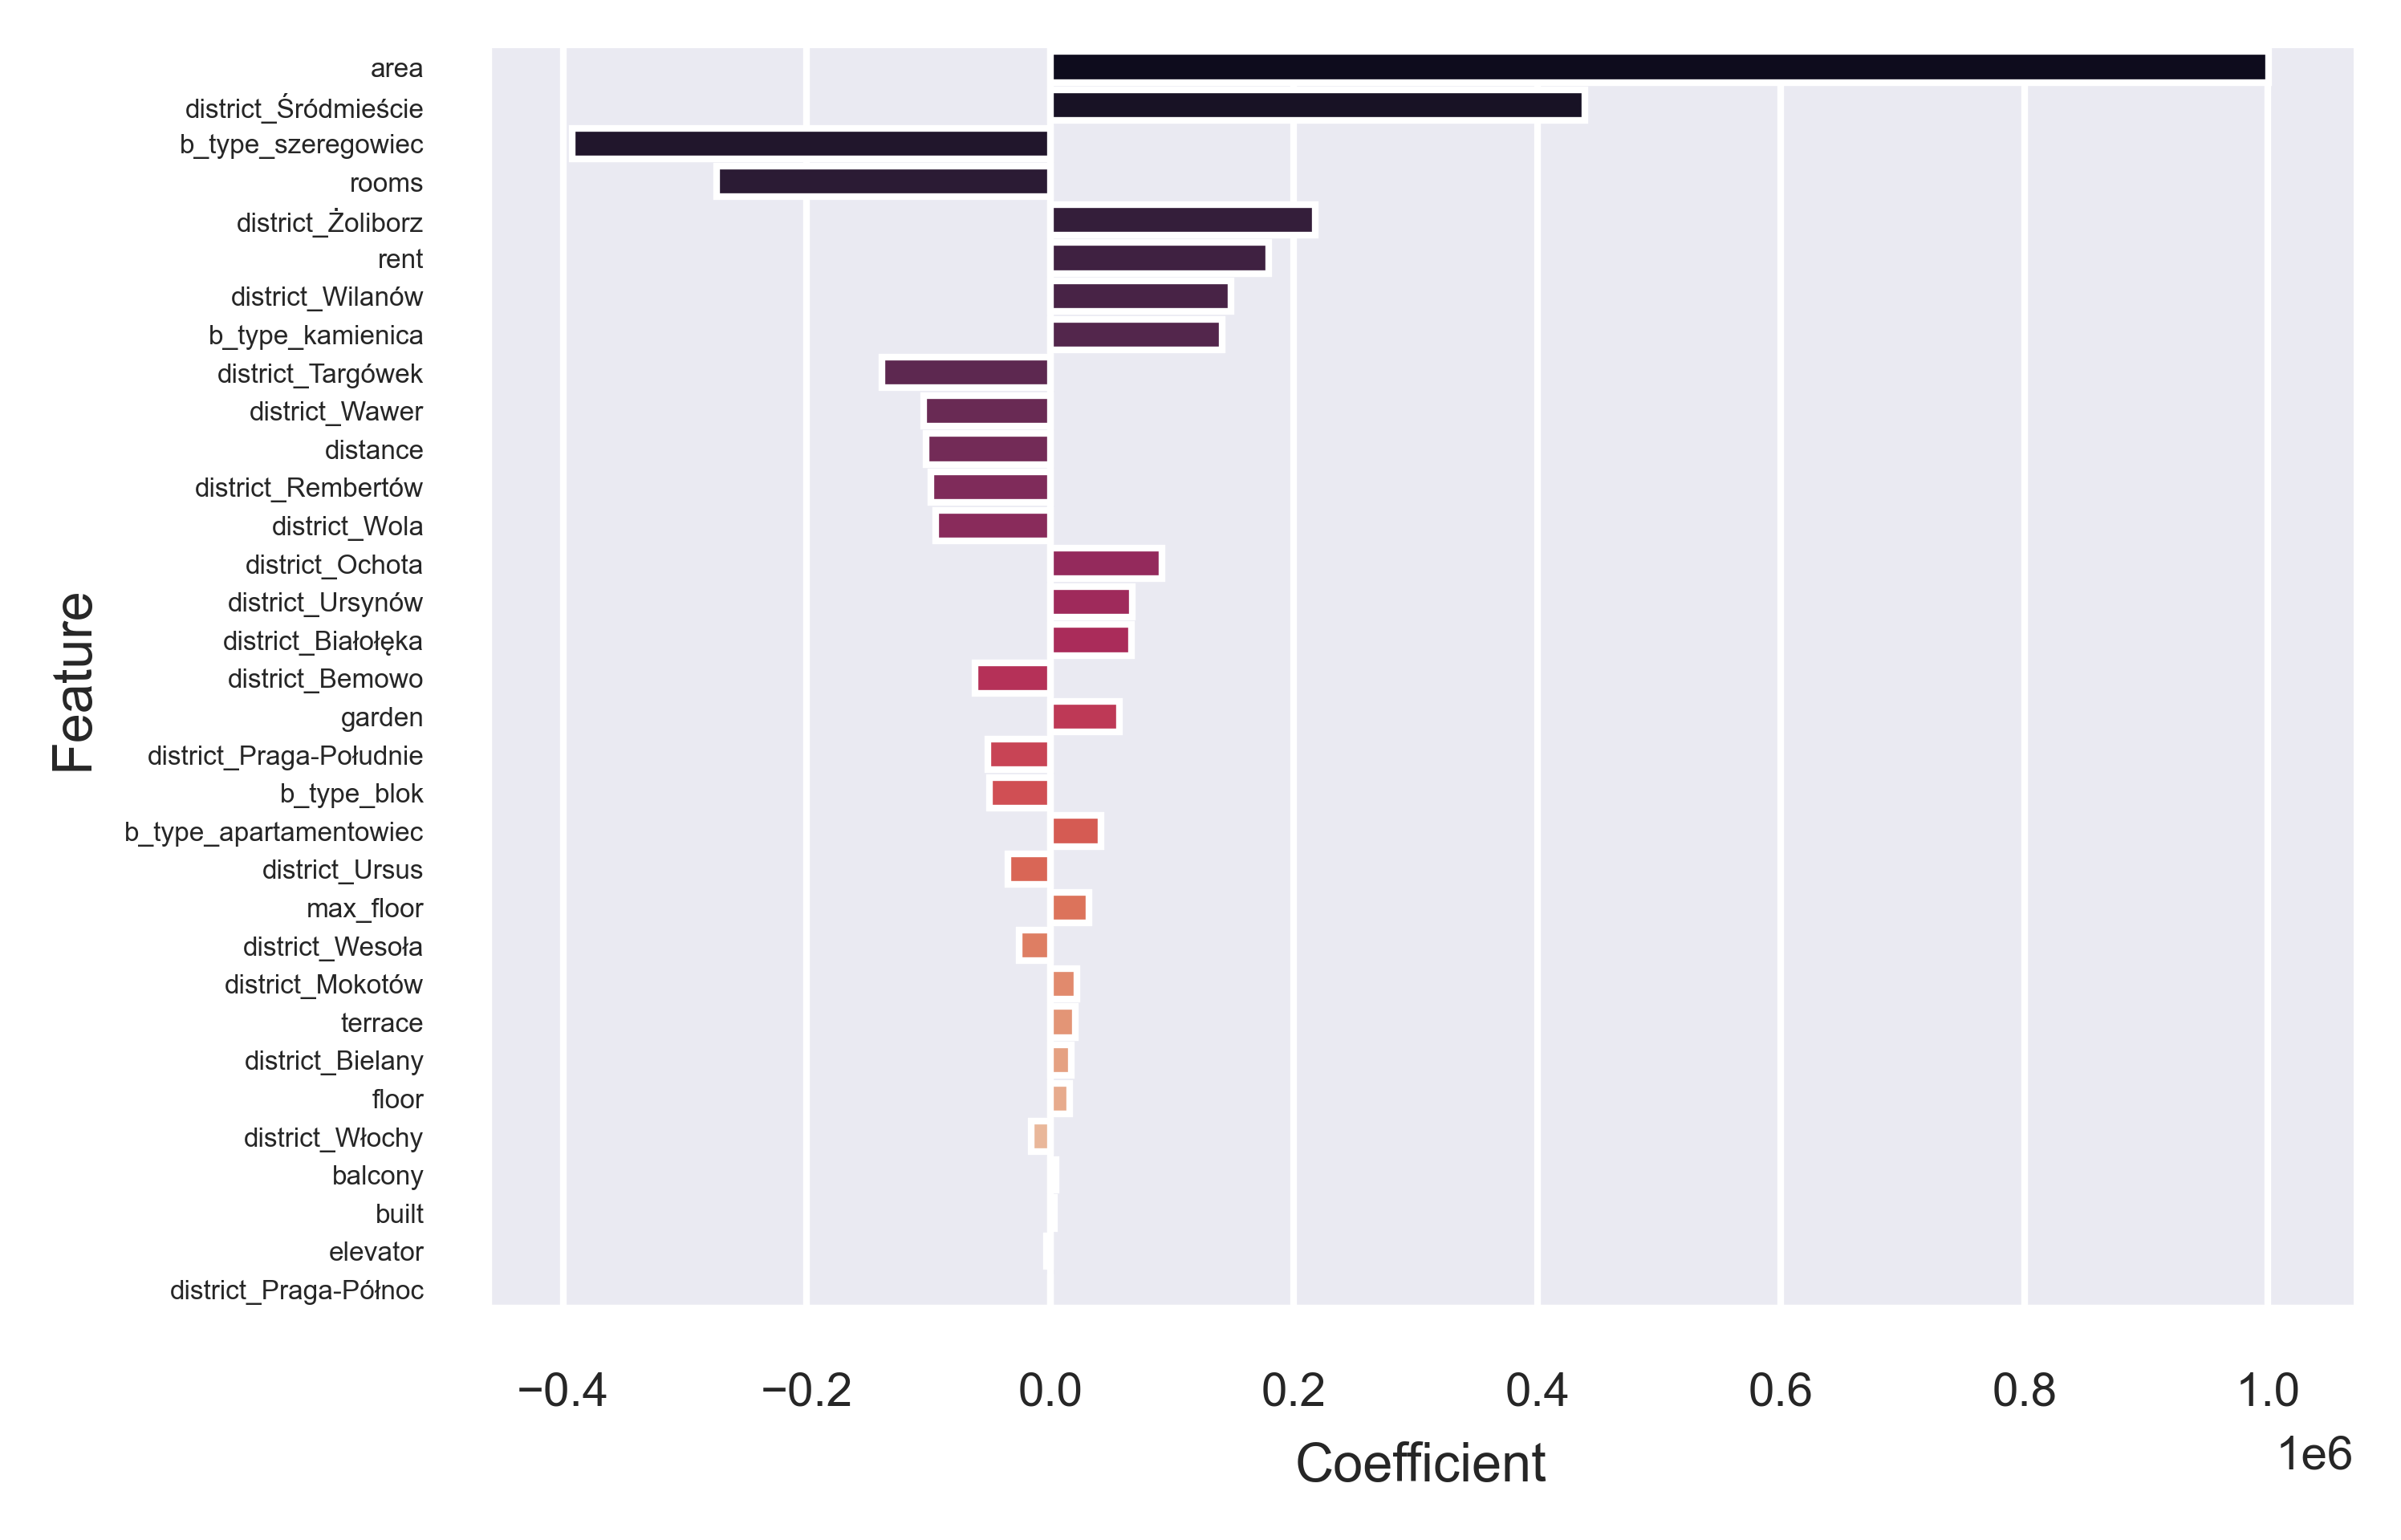

In [27]:
coef_plot(model)

## Elastic Net

In [28]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train);

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 347213.0095214781
MSE: 1439905894497.814
RMSE: 1199960.7887334544
R²: 0.575131821347128


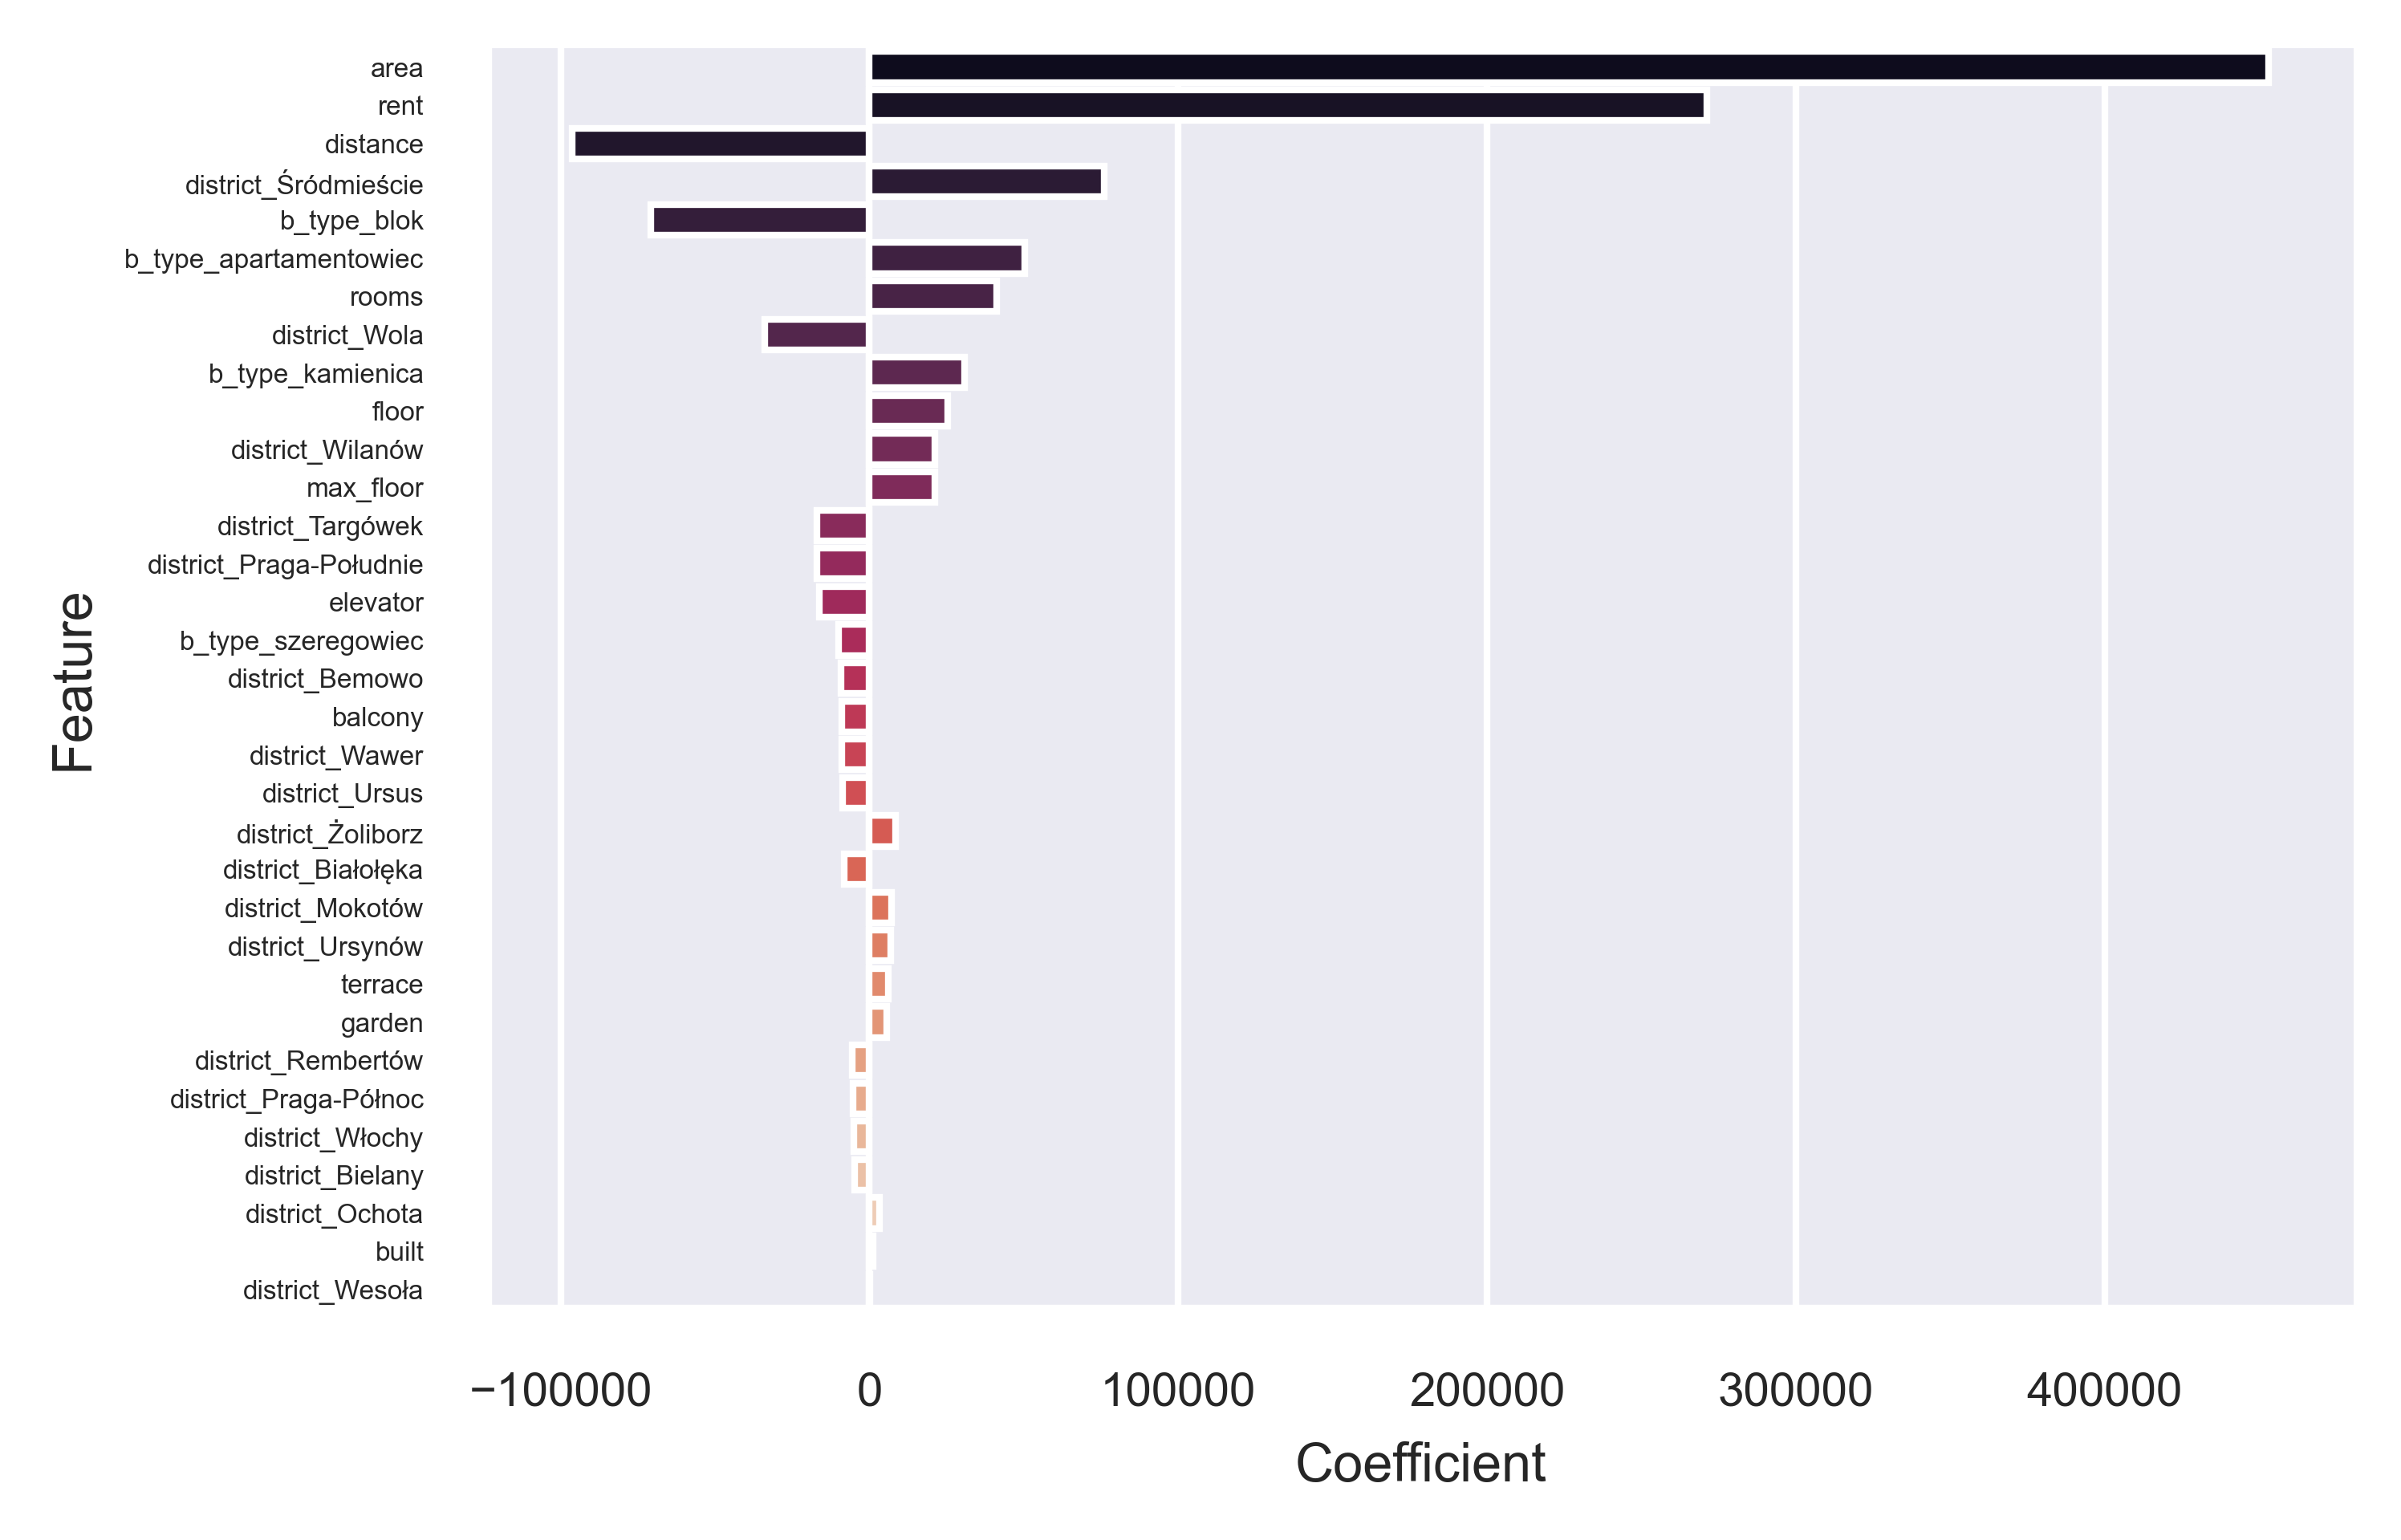

In [30]:
coef_plot(model)

In [31]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 336272.1668254984
MSE: 1528102068714.1428
RMSE: 1236164.2563648825
R²: 0.5491080735128907


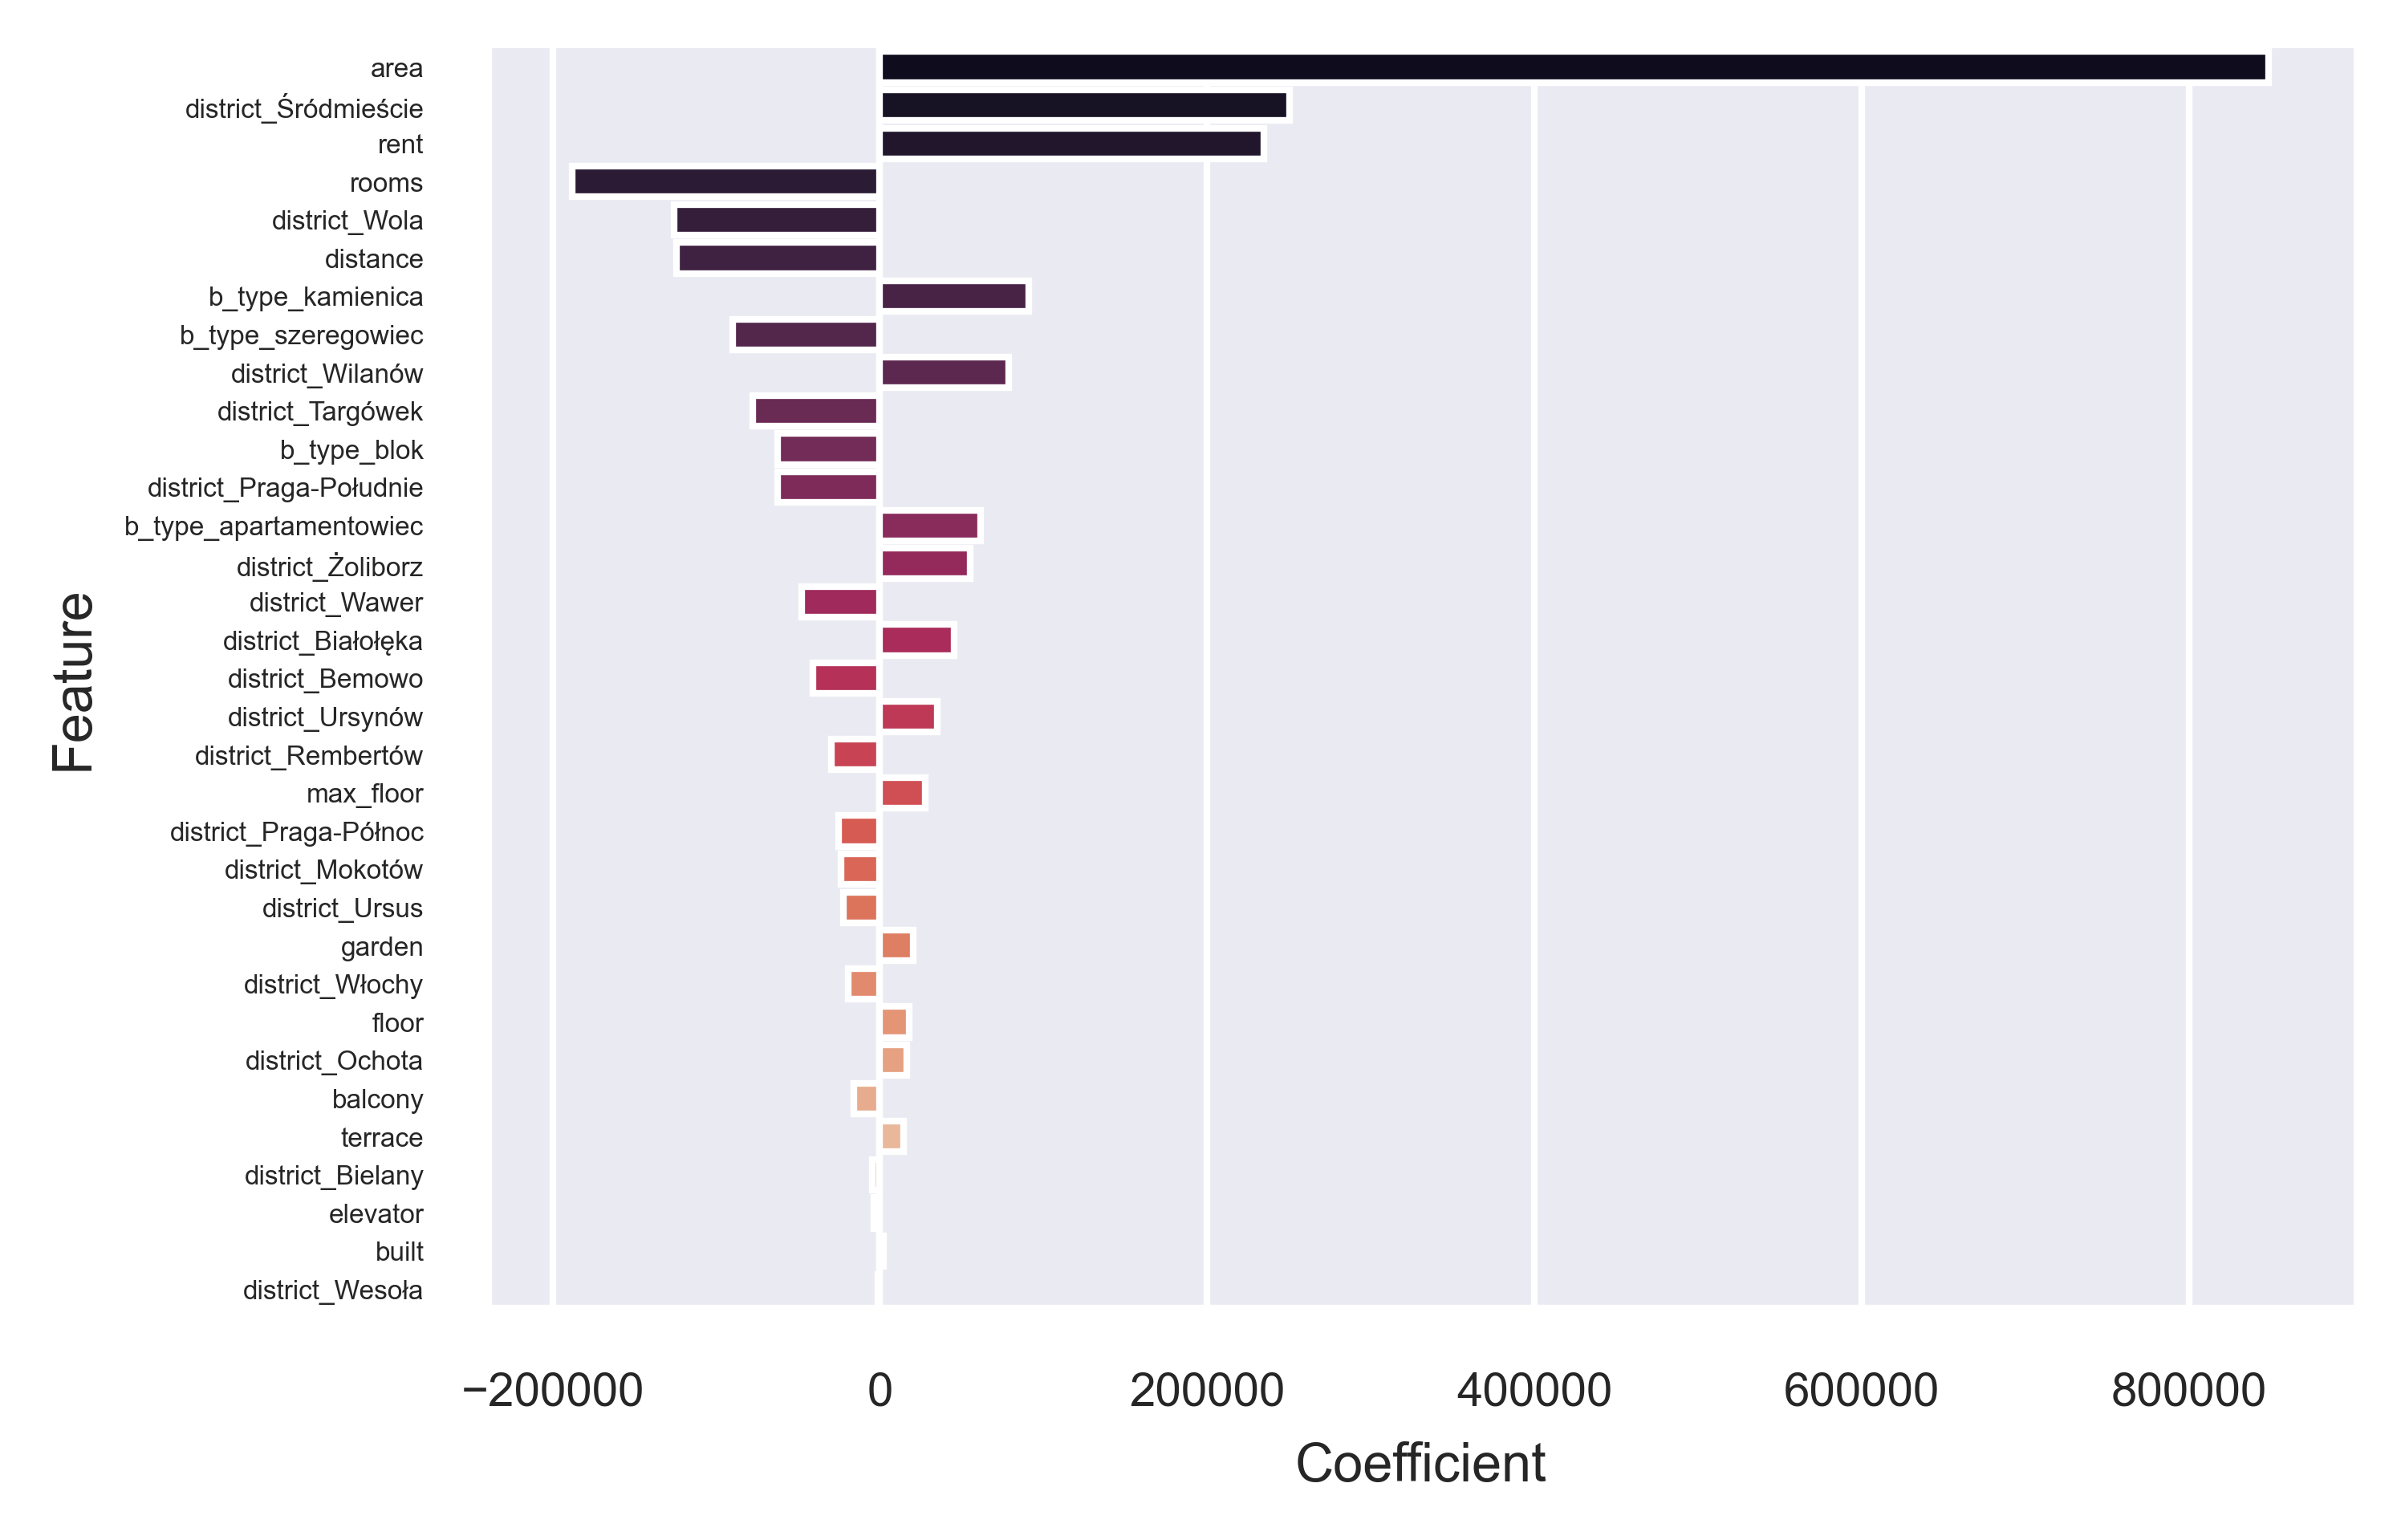

In [33]:
coef_plot(model)

So far I've got best results using ElasticNet with GridSearch. Let's try different algorithms and techniques.

## Polynomial Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [41]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 241389.00486727429
MSE: 268105878452.15833
RMSE: 517789.41516040894
R²: 0.9208909021767535


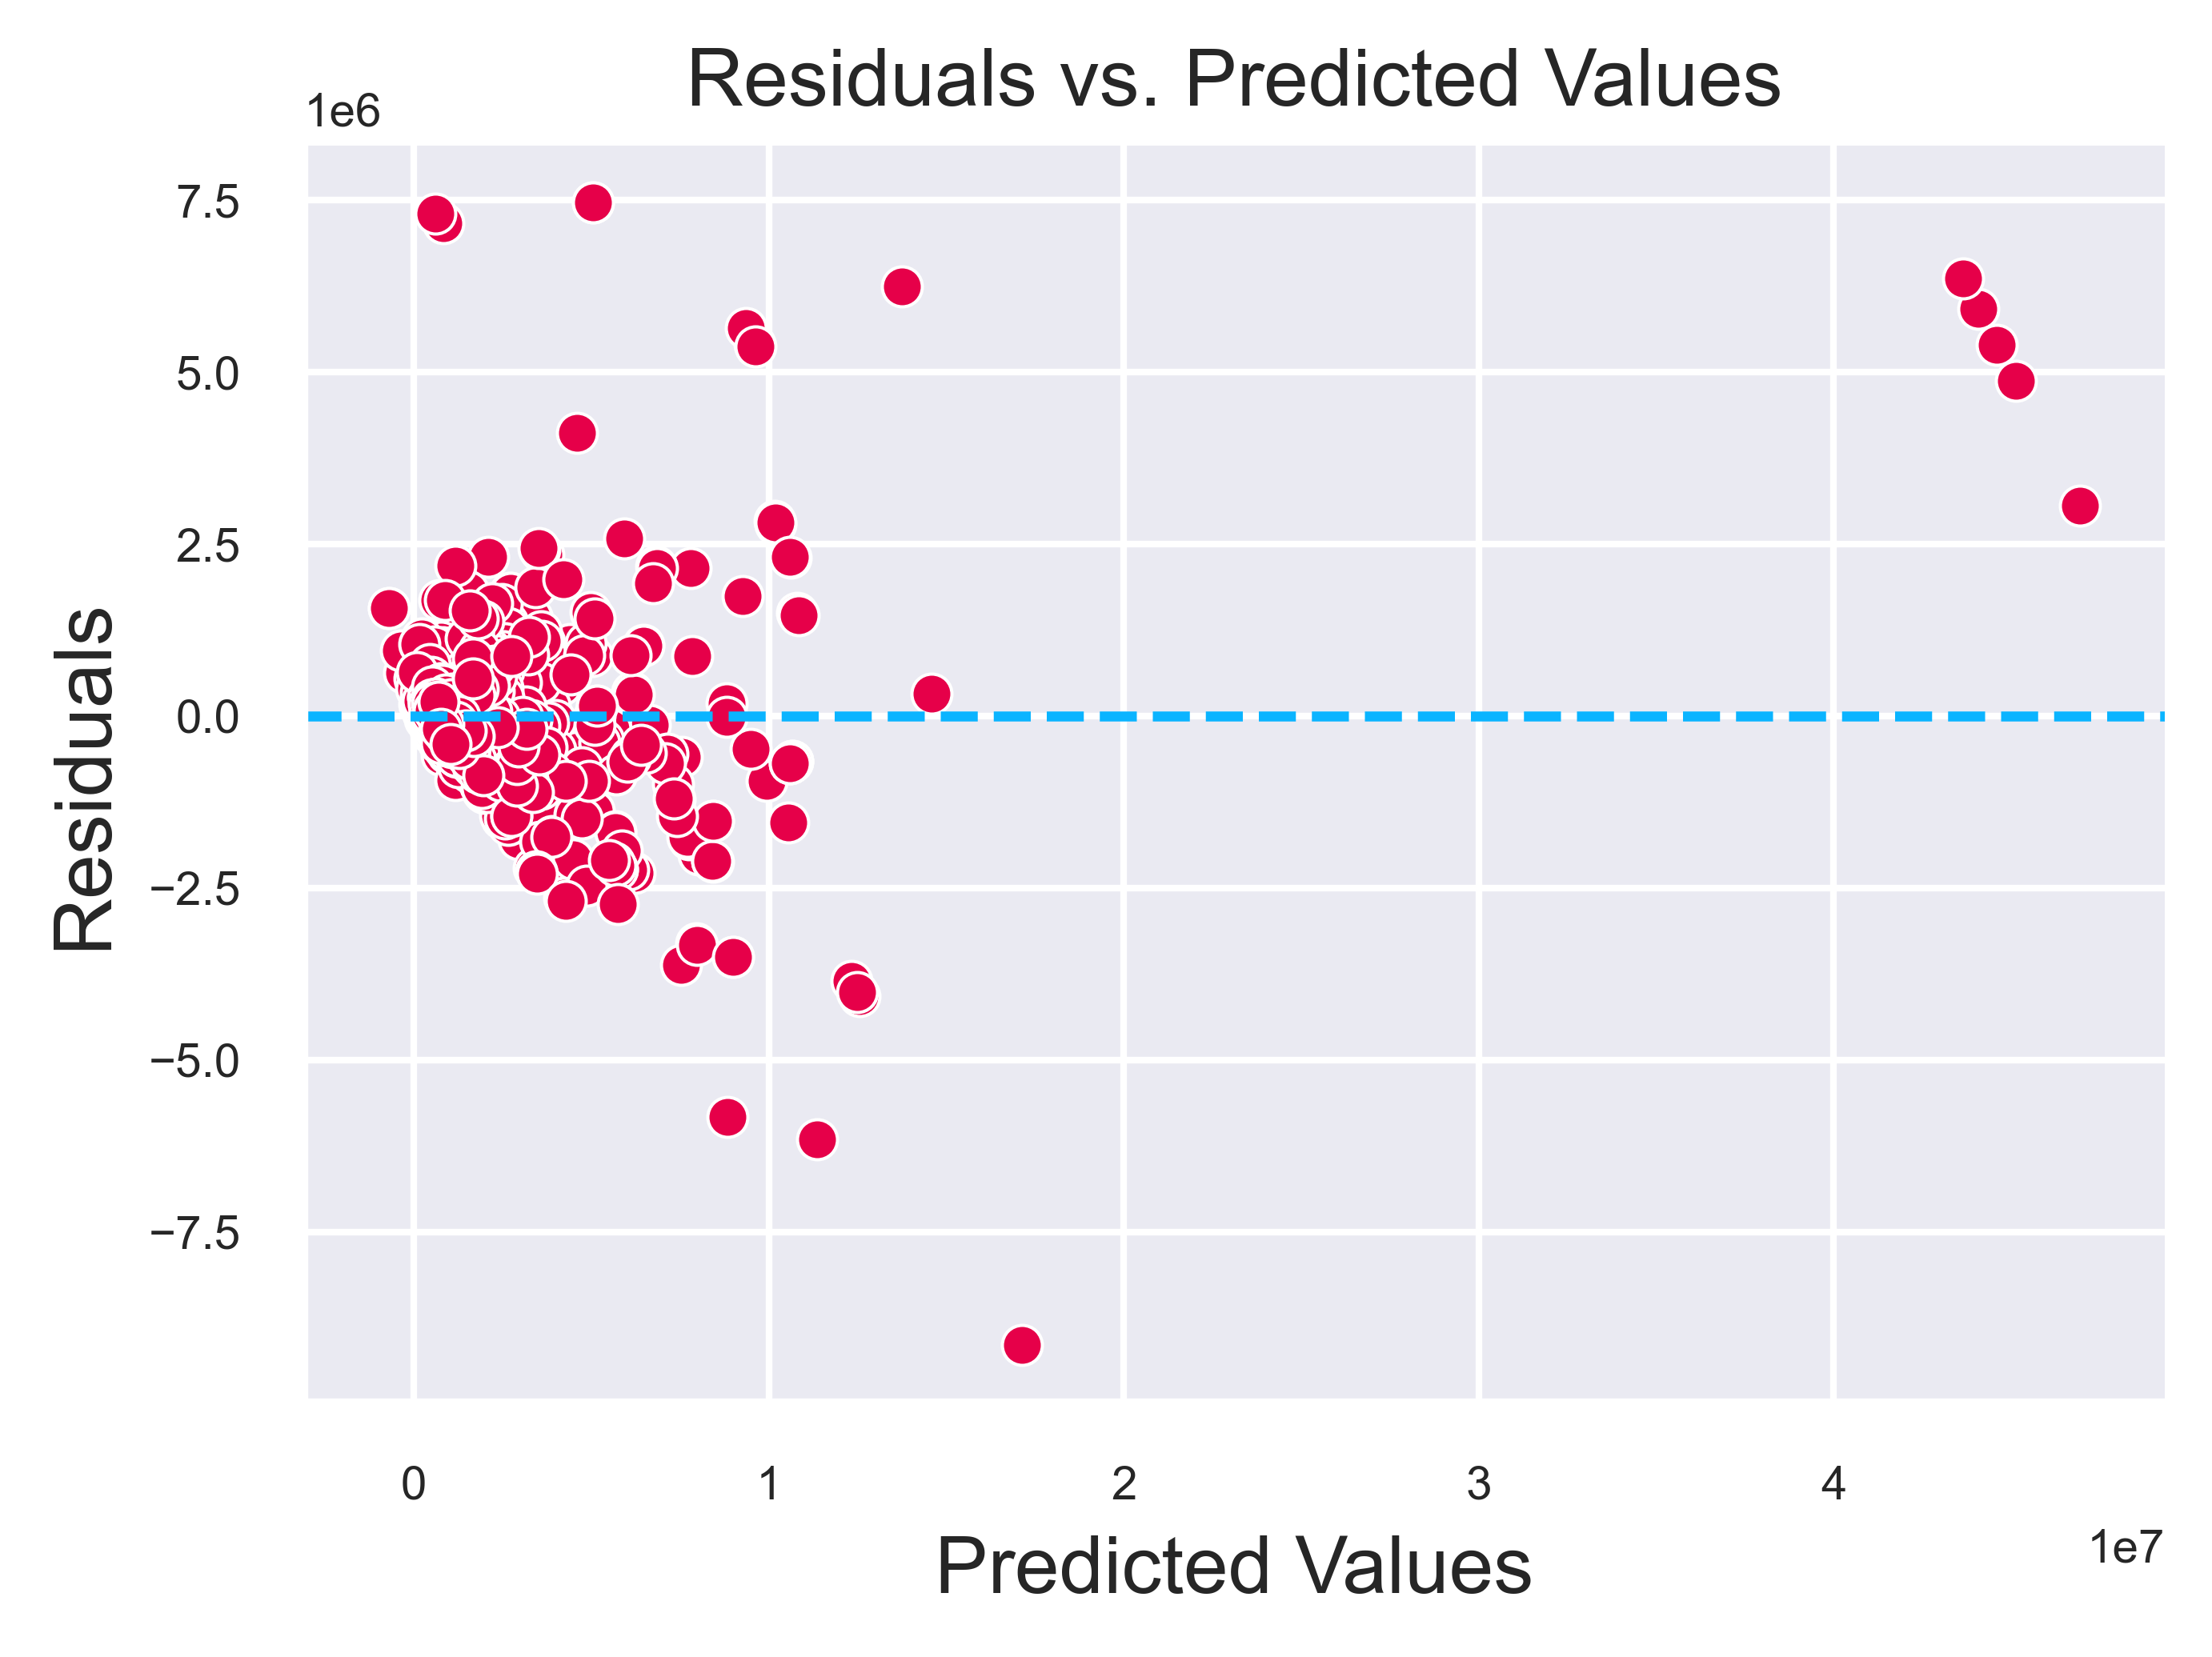

In [65]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

### Cross Validation using KFolds

In [60]:
from sklearn.model_selection import cross_val_score, KFold

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()

cv_scores = cross_val_score(model, X_poly, Y, cv=kf, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation R² Scores: {np.std(cv_scores)}")

Cross-Validation R² Scores: [0.92089103 0.84947421 0.86350251 0.88705251 0.7742651 ]
Mean Cross-Validation R² Score: 0.859037070919084
Standard Deviation of Cross-Validation R² Scores: 0.04880256419626178


## Ridge Regression

In [67]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [68]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 241167.6453133135
MSE: 269915818607.16418
RMSE: 519534.2323727708
R²: 0.9203568492361645


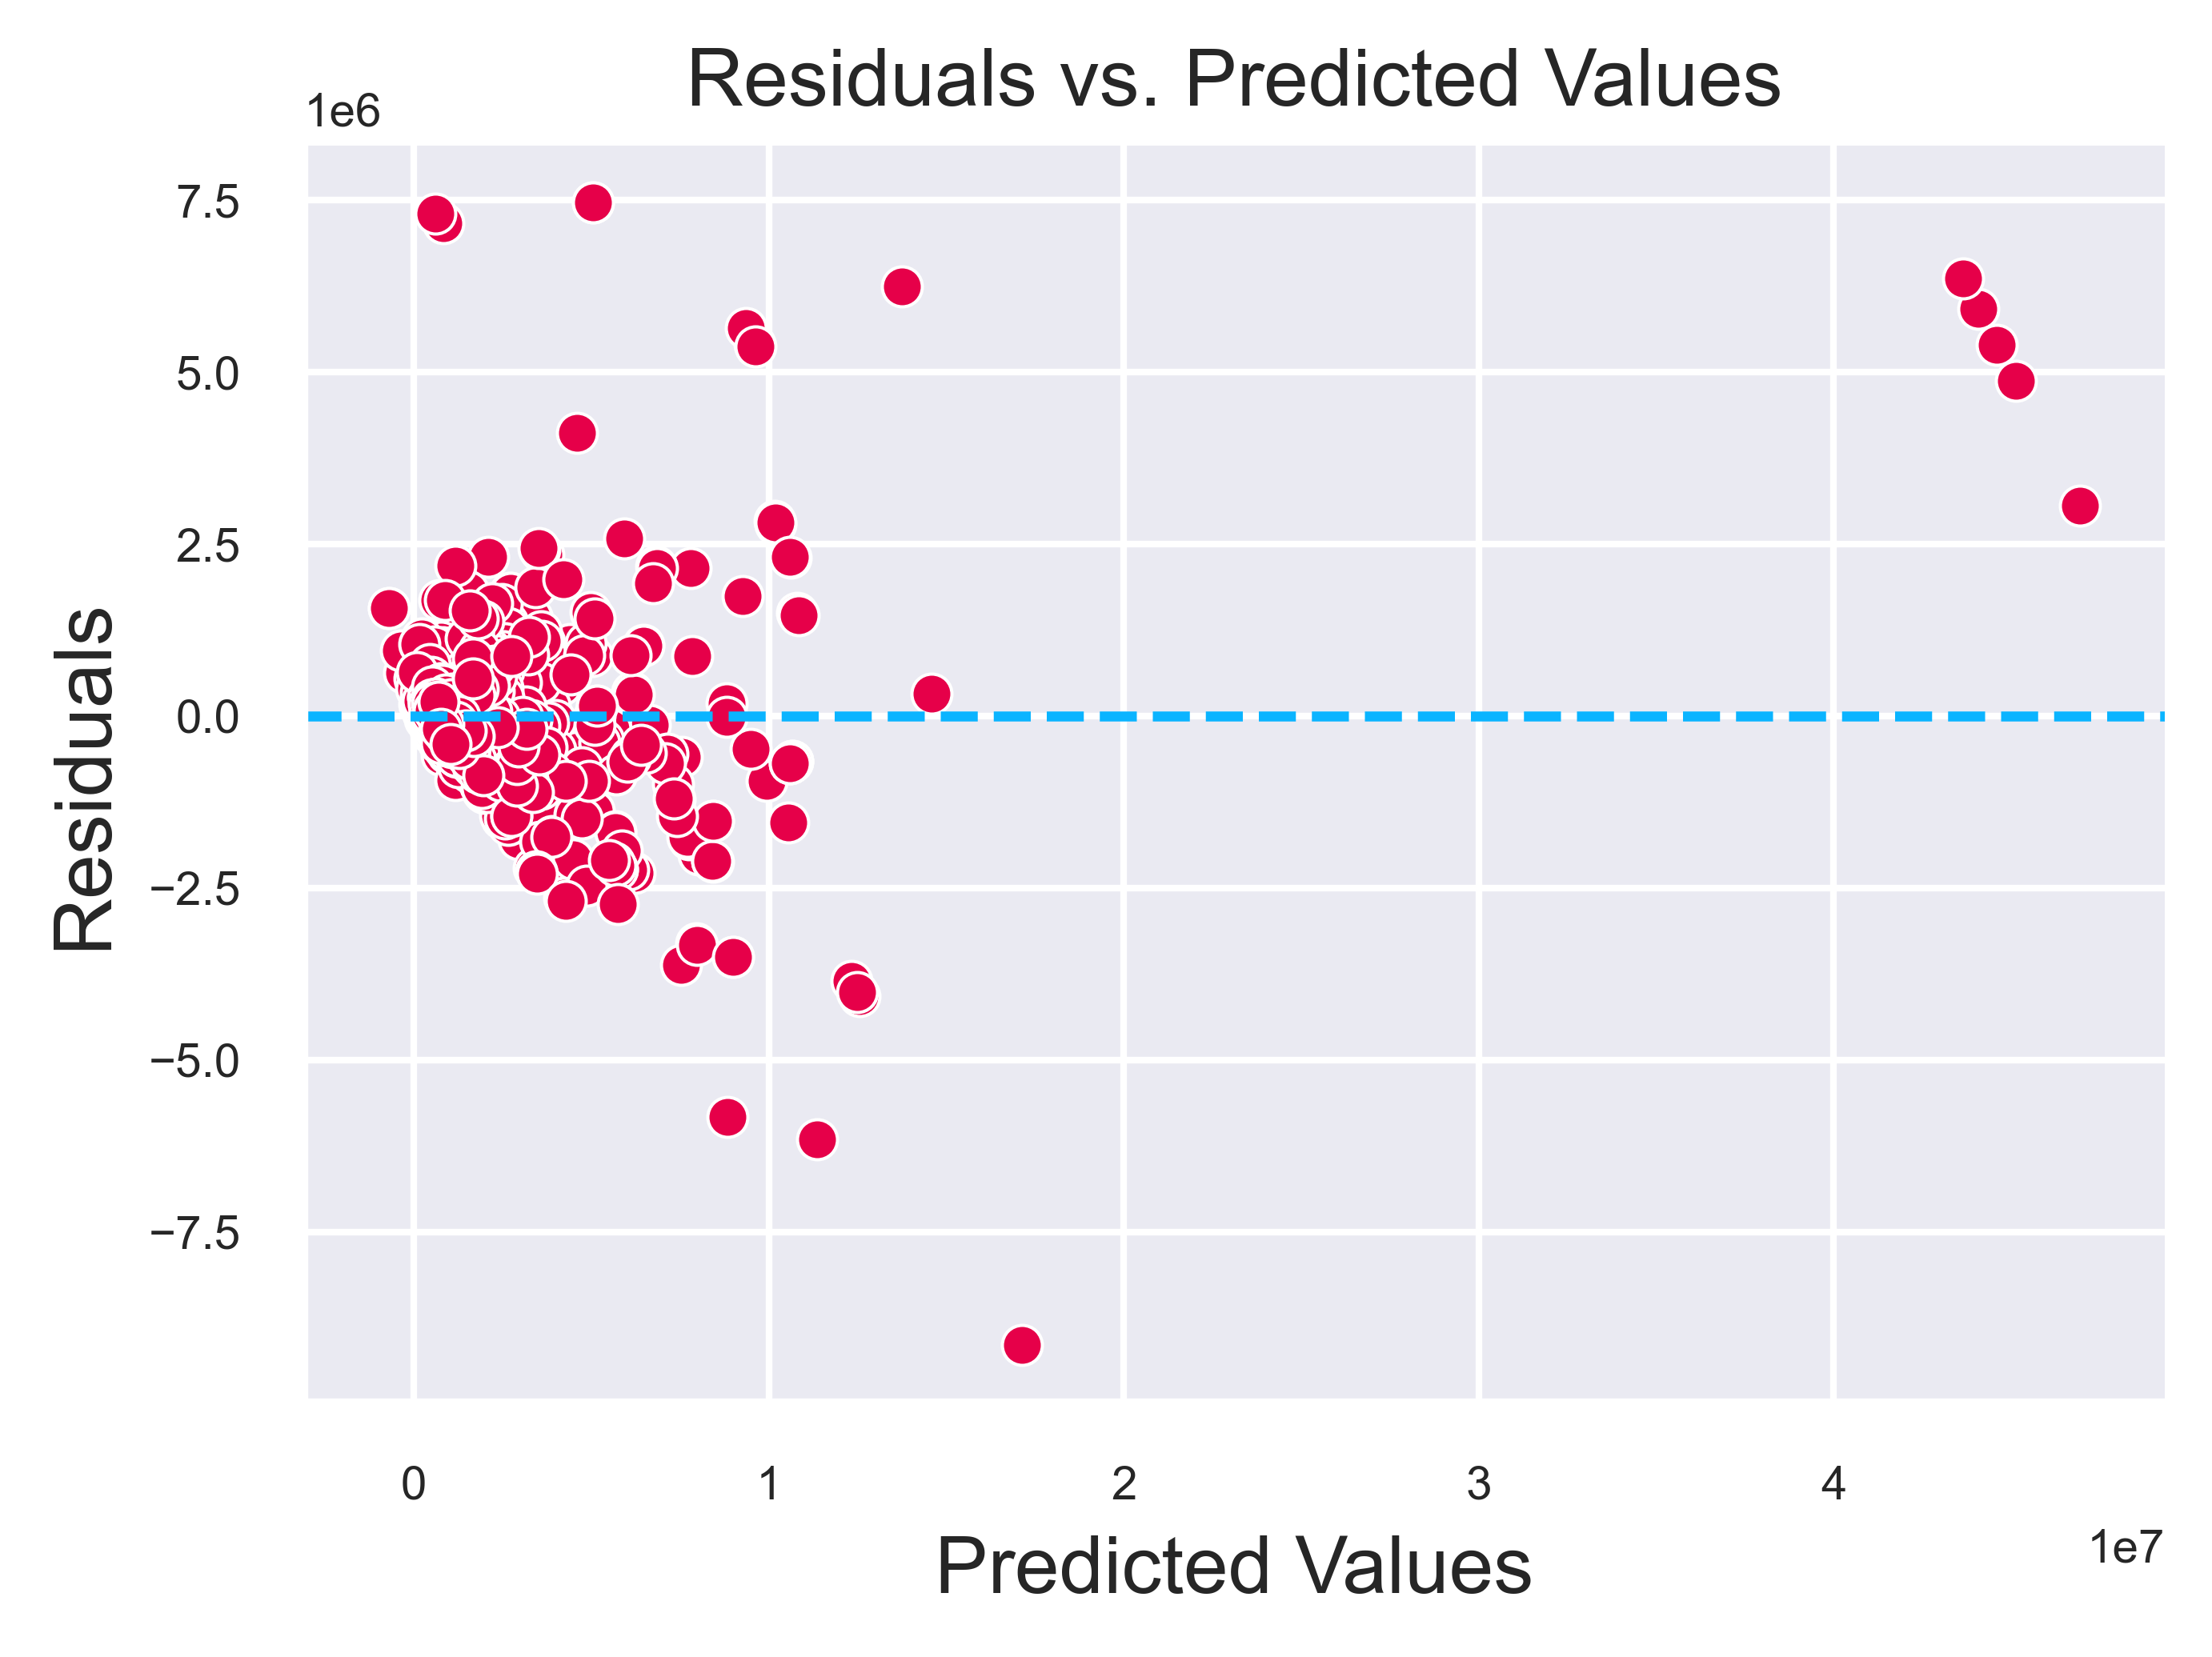

In [69]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

### Cross Validation

In [70]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = Ridge()

cv_scores = cross_val_score(model, X_poly, Y, cv=kf, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation R² Scores: {np.std(cv_scores)}")

Cross-Validation R² Scores: [0.92035685 0.84960862 0.86353477 0.88715799 0.77387521]
Mean Cross-Validation R² Score: 0.8589066889039989
Standard Deviation of Cross-Validation R² Scores: 0.04881082568608712


## Lasso Regression

In [89]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

model = Lasso()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.204e+15, tolerance: 3.447e+12
  model = cd_fast.enet_coordinate_descent(


In [90]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 242967.21513612726
MSE: 284611749386.96405
RMSE: 533490.1586598989
R²: 0.9160205704780309


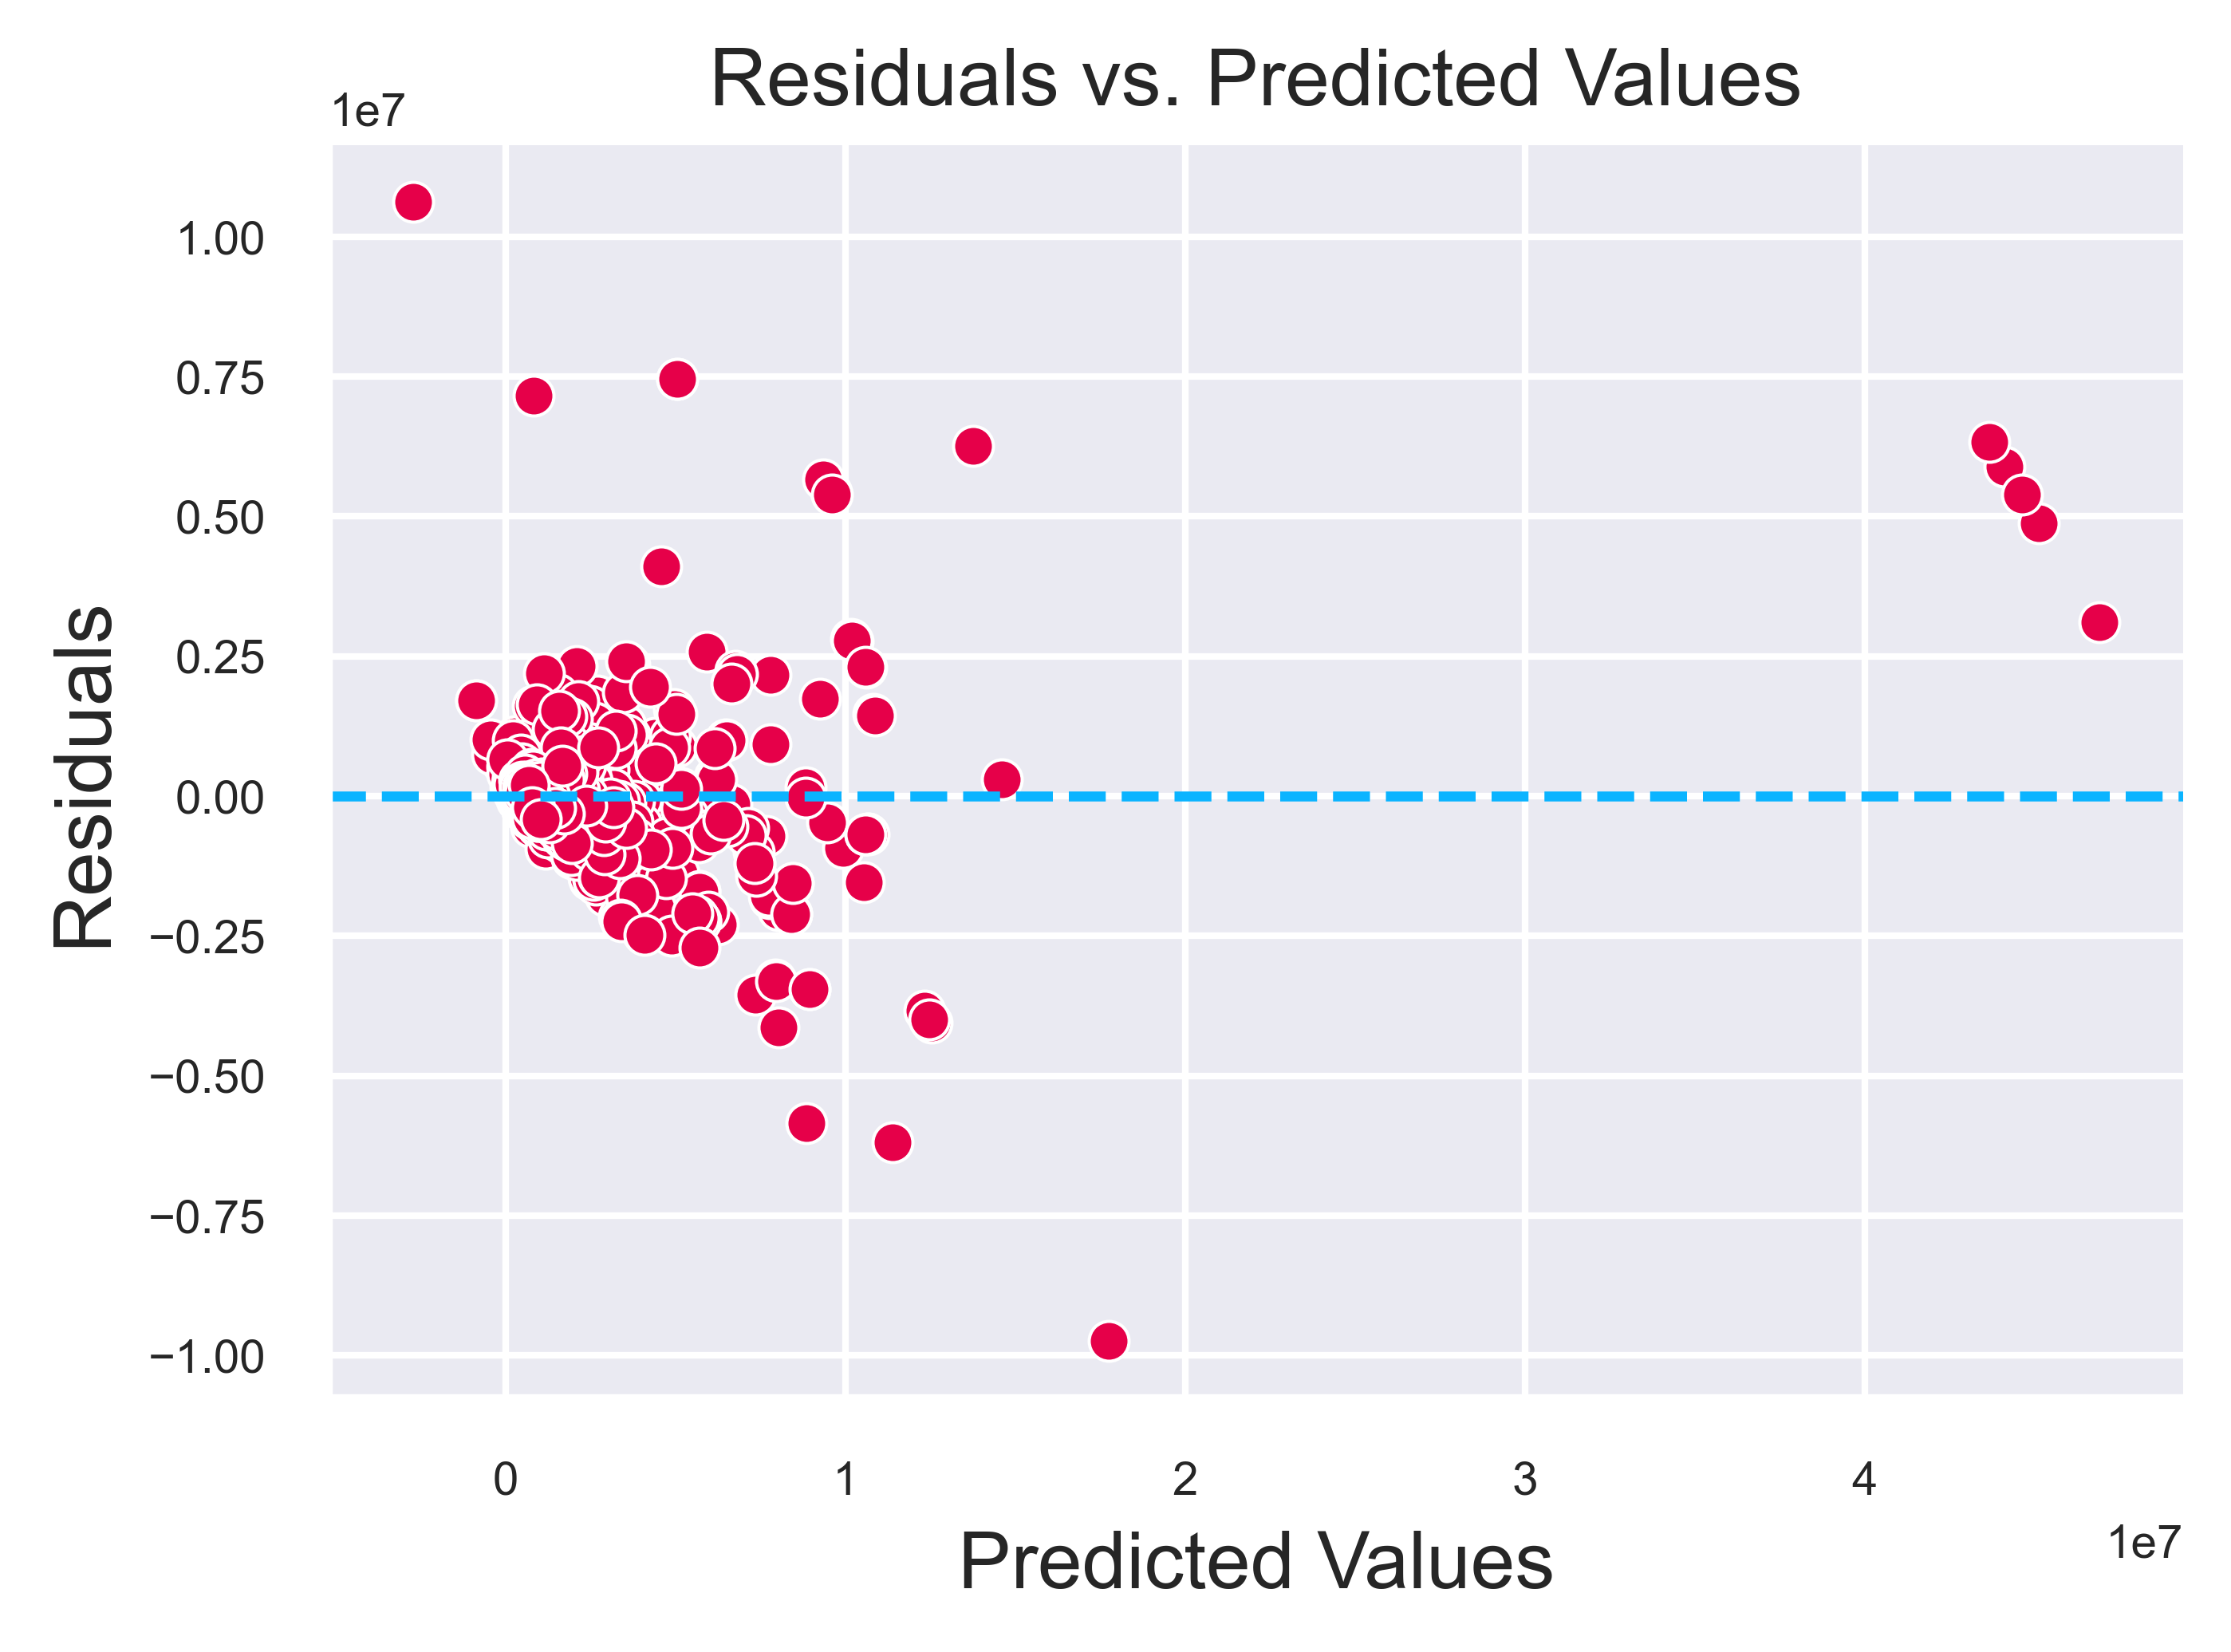

In [92]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

### Cross Validation

In [74]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = Ridge()

cv_scores = cross_val_score(model, X_poly, Y, cv=kf, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation R² Scores: {np.std(cv_scores)}")

Cross-Validation R² Scores: [0.92035685 0.84960862 0.86353477 0.88715799 0.77387521]
Mean Cross-Validation R² Score: 0.8589066889039989
Standard Deviation of Cross-Validation R² Scores: 0.04881082568608712


## Elastic Net with Grid Search

In [82]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid_search.fit(X_train, y_train);
model = grid_search.best_estimator_
y_pred = model.predict(X_test)

/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.118e+15, tolerance: 2.719e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.001e+15, tolerance: 2.647e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did no

In [83]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 250182.7372684257
MSE: 713920674501.852
RMSE: 844938.2666809759
R²: 0.789345833059445


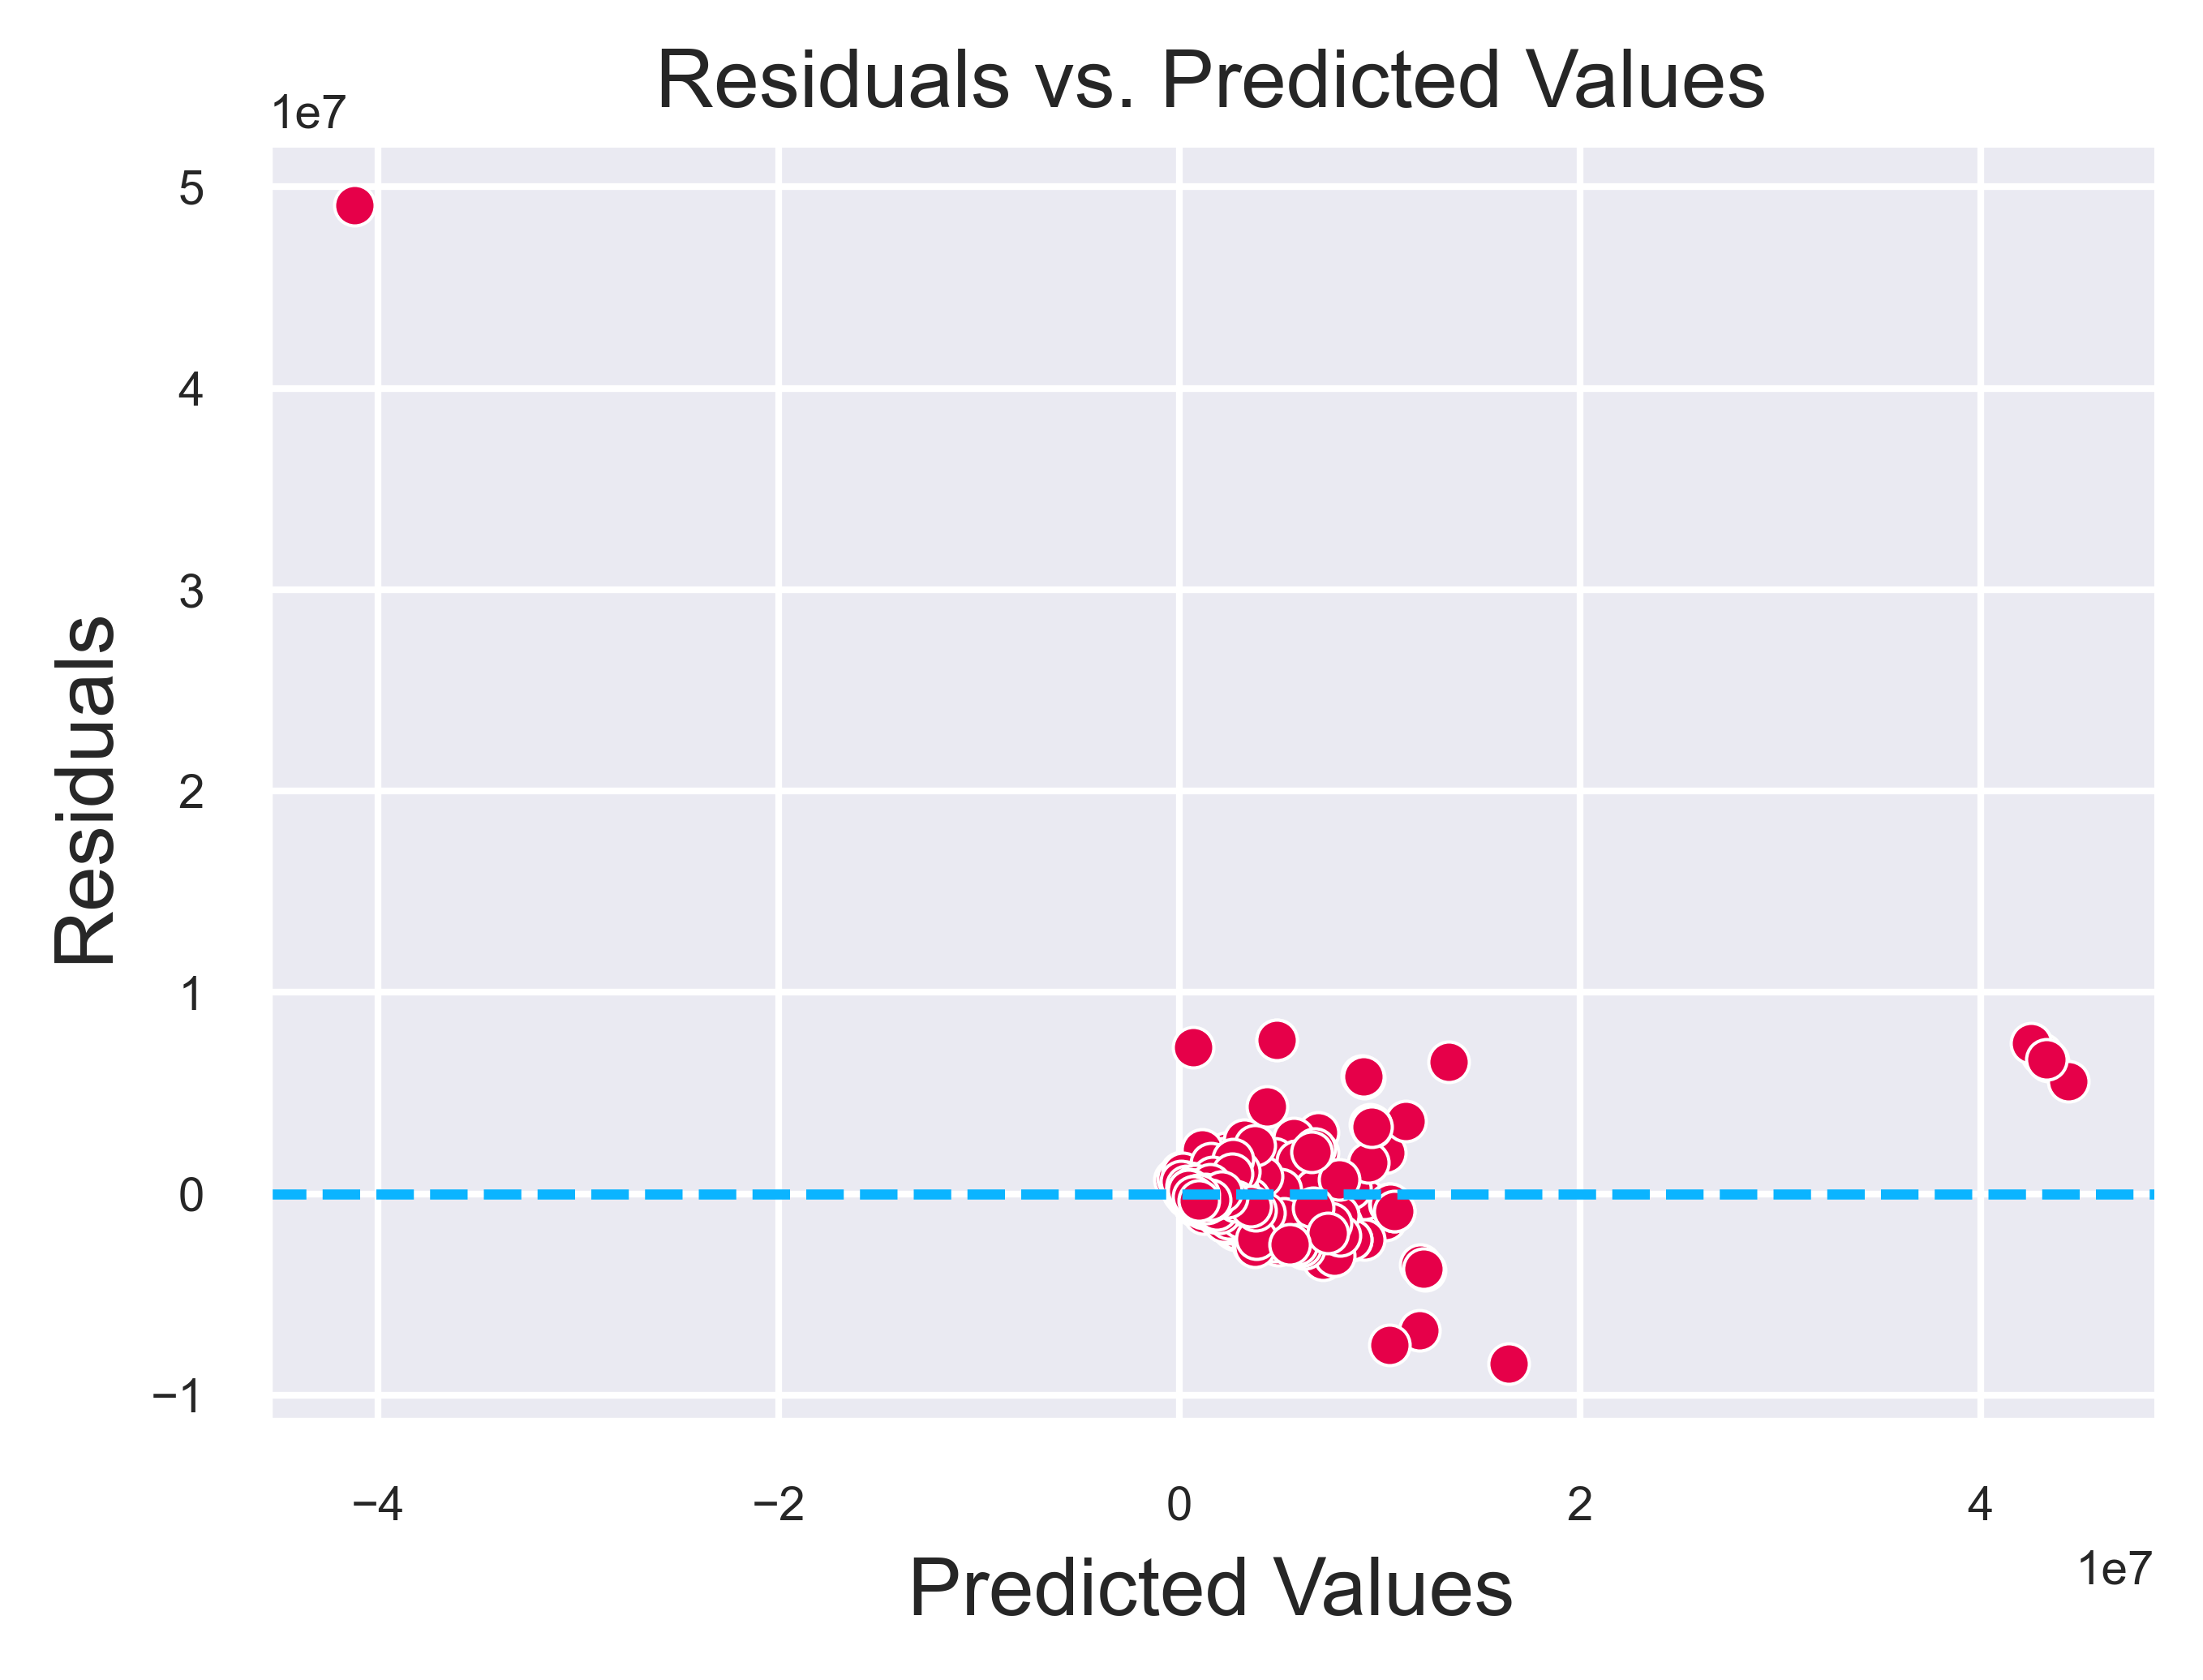

In [88]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

### Cross Validation

In [81]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

kf = KFold(n_splits=5, shuffle=True, random_state=42);

cv_scores = cross_val_score(model, X_poly, Y, cv=kf, scoring='r2');

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of Cross-Validation R² Scores: {np.std(cv_scores)}")

/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.613e+15, tolerance: 3.447e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.760e+15, tolerance: 4.491e+12
  model = cd_fast.enet_coordinate_descent(
/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did no

Cross-Validation R² Scores: [0.78934583 0.85298001 0.85451869 0.87720125 0.76370417]
Mean Cross-Validation R² Score: 0.8275499888724284
Standard Deviation of Cross-Validation R² Scores: 0.04330147889666299


/Users/mateuszlambert/Desktop/SKN DS/apartment-price-prediction/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+15, tolerance: 4.587e+12
  model = cd_fast.enet_coordinate_descent(


## Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train);

In [95]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 242967.21513612726
MSE: 284611749386.96405
RMSE: 533490.1586598989
R²: 0.9160205704780309


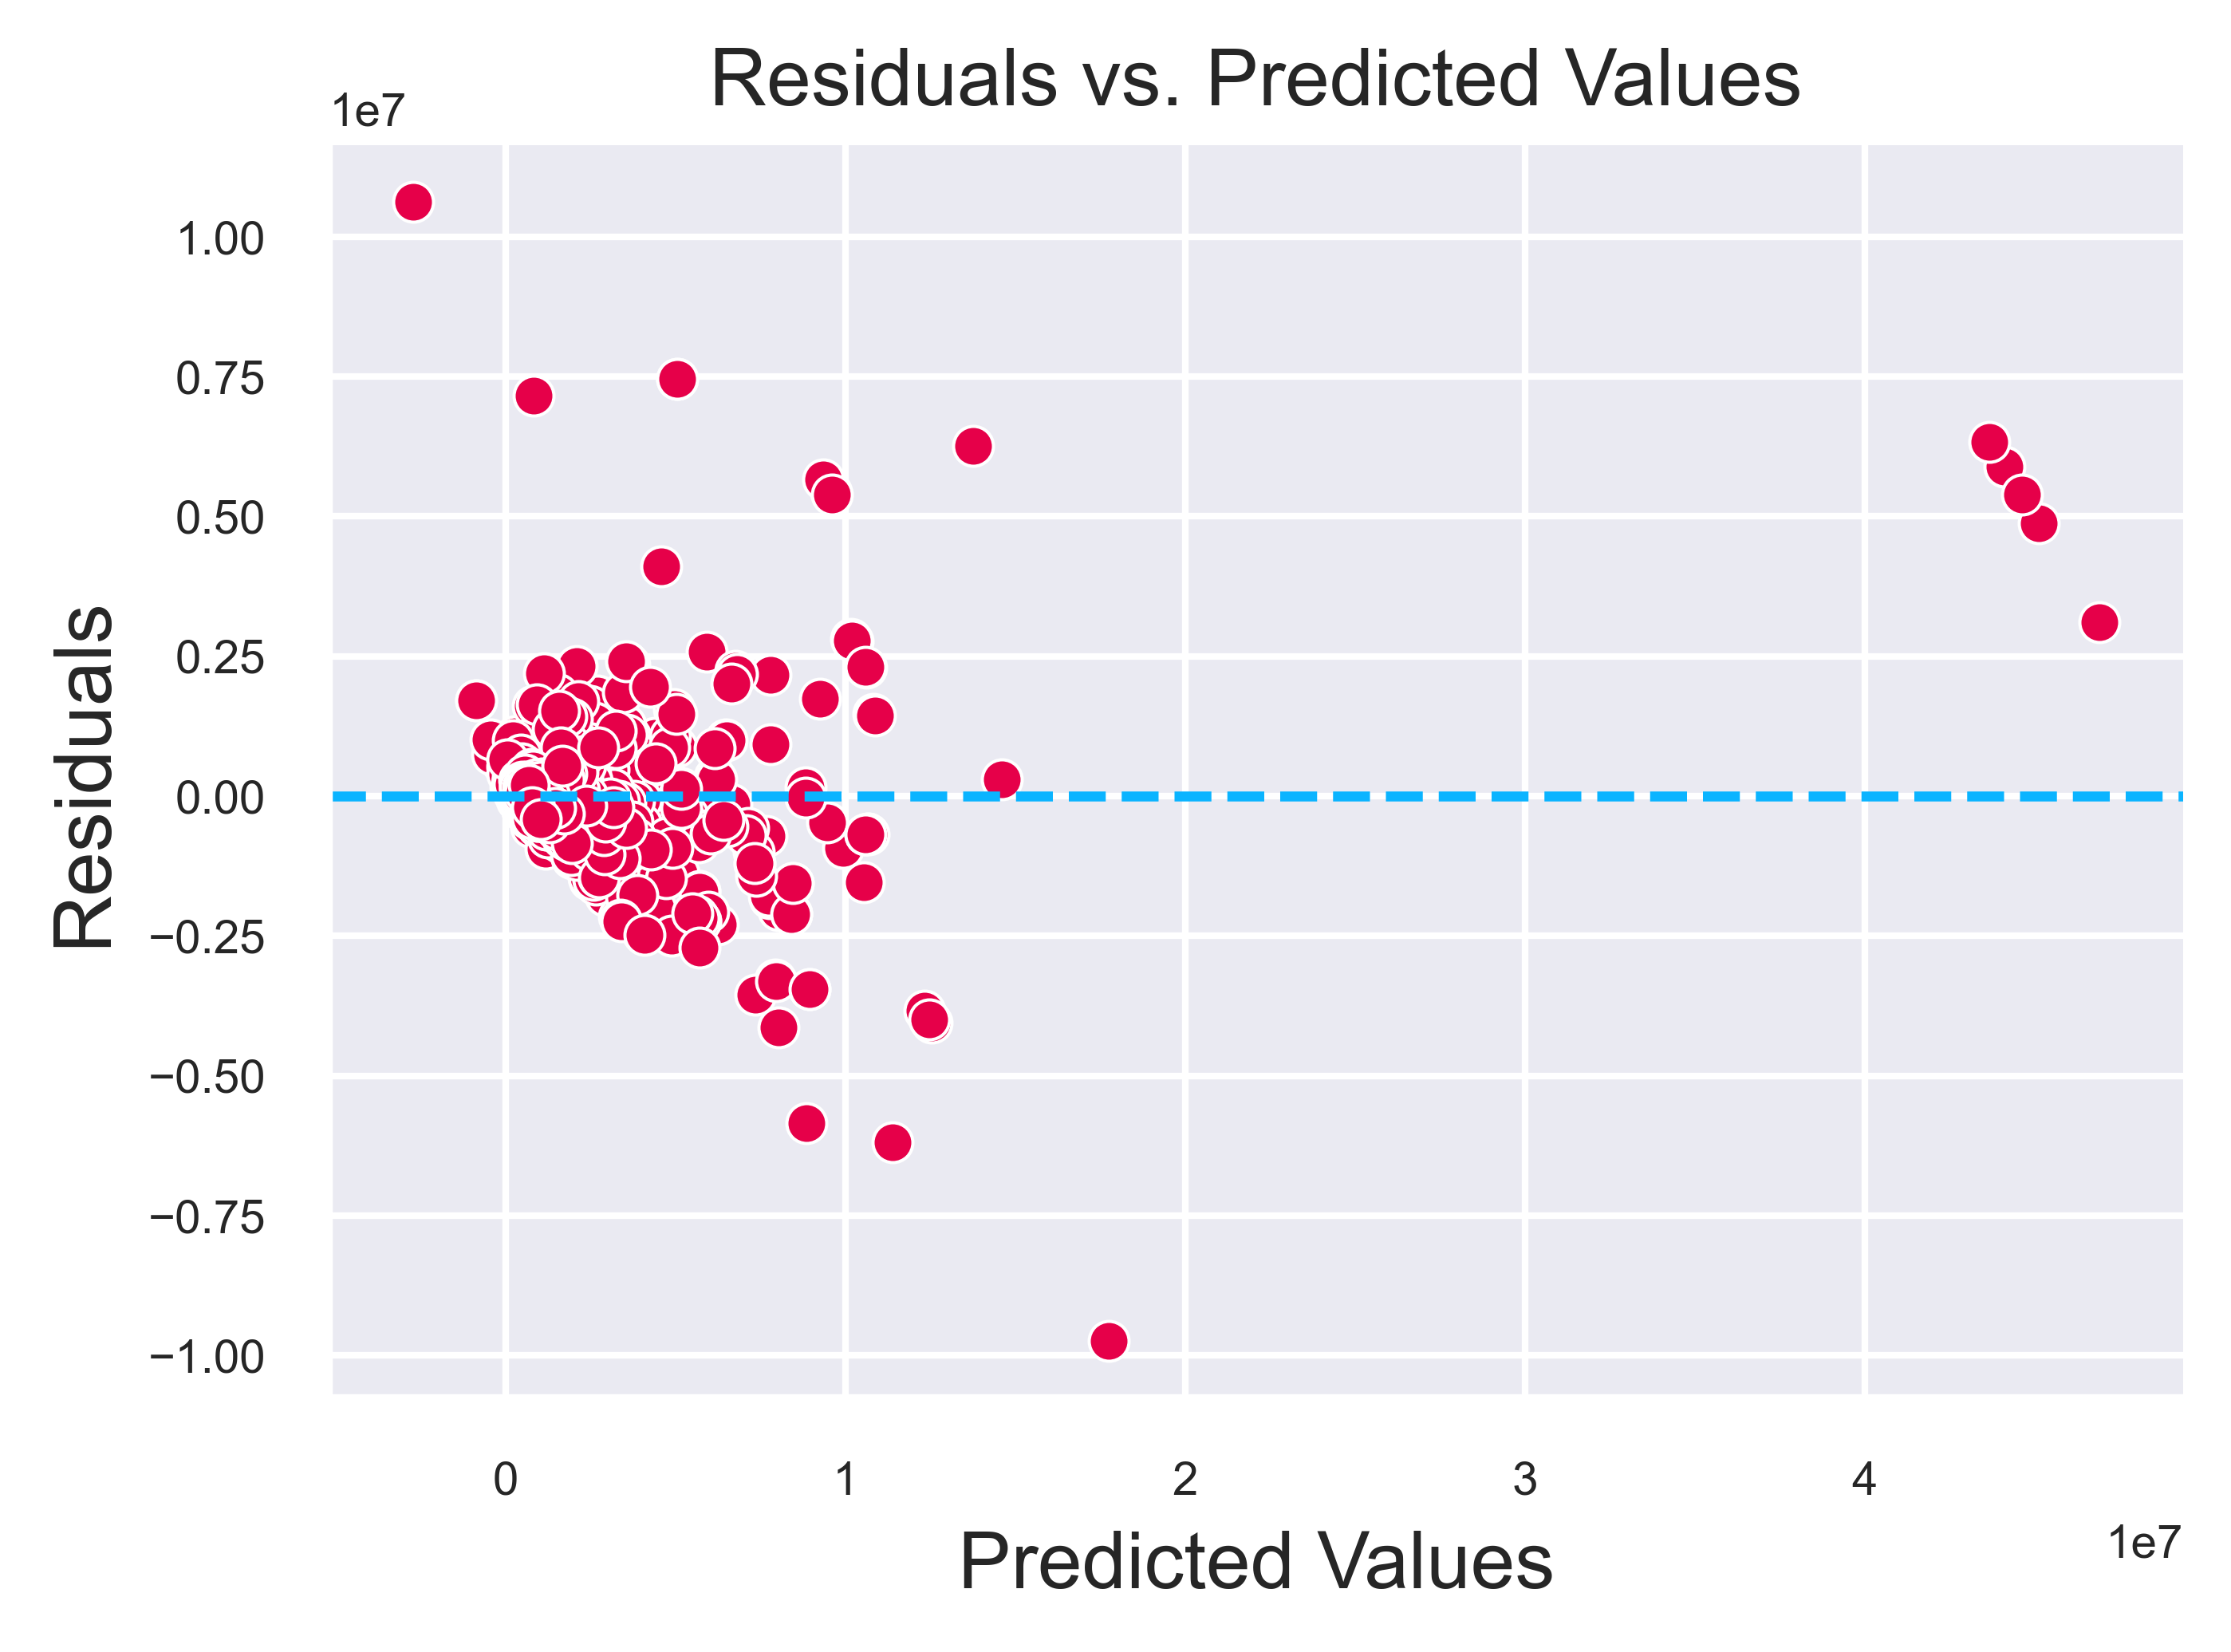

In [97]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

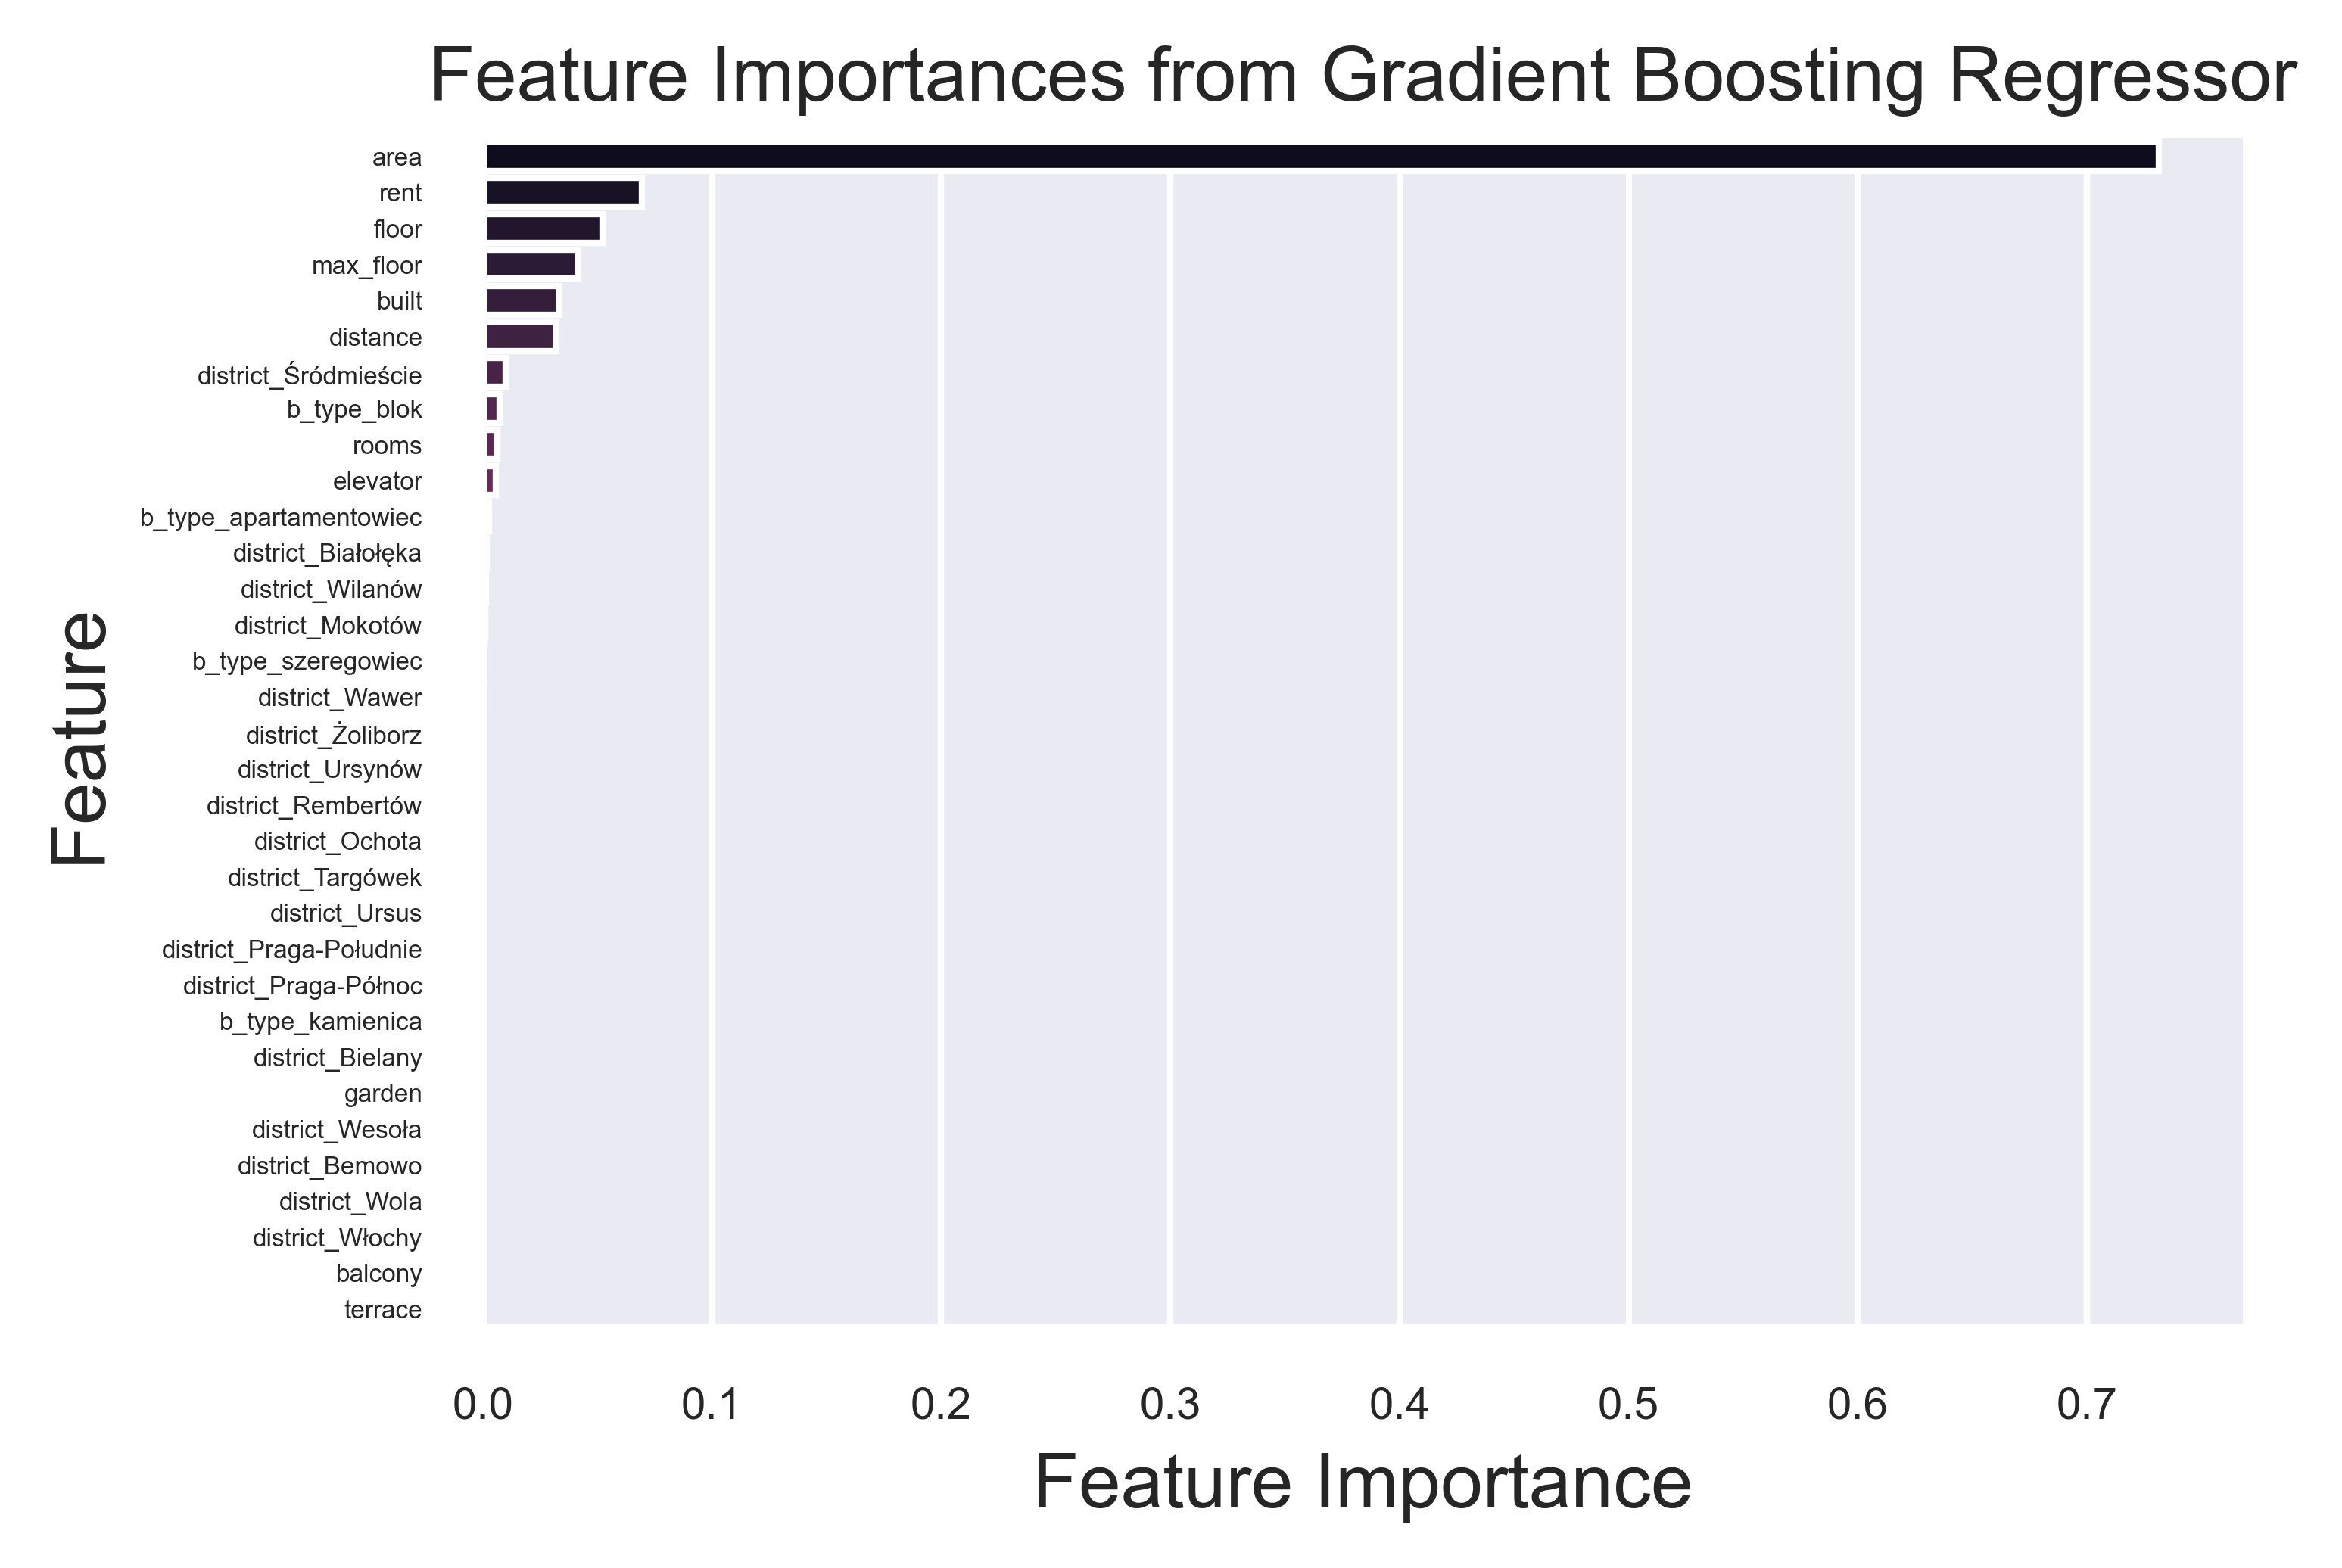

In [104]:
feature_importances = model.feature_importances_
feature_names = X.columns

features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

features_df = features_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=features_df, hue='Feature', palette='rocket')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.yticks(fontsize=4)
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

## Regression Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train);

In [109]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 242967.21513612726
MSE: 284611749386.96405
RMSE: 533490.1586598989
R²: 0.9160205704780309


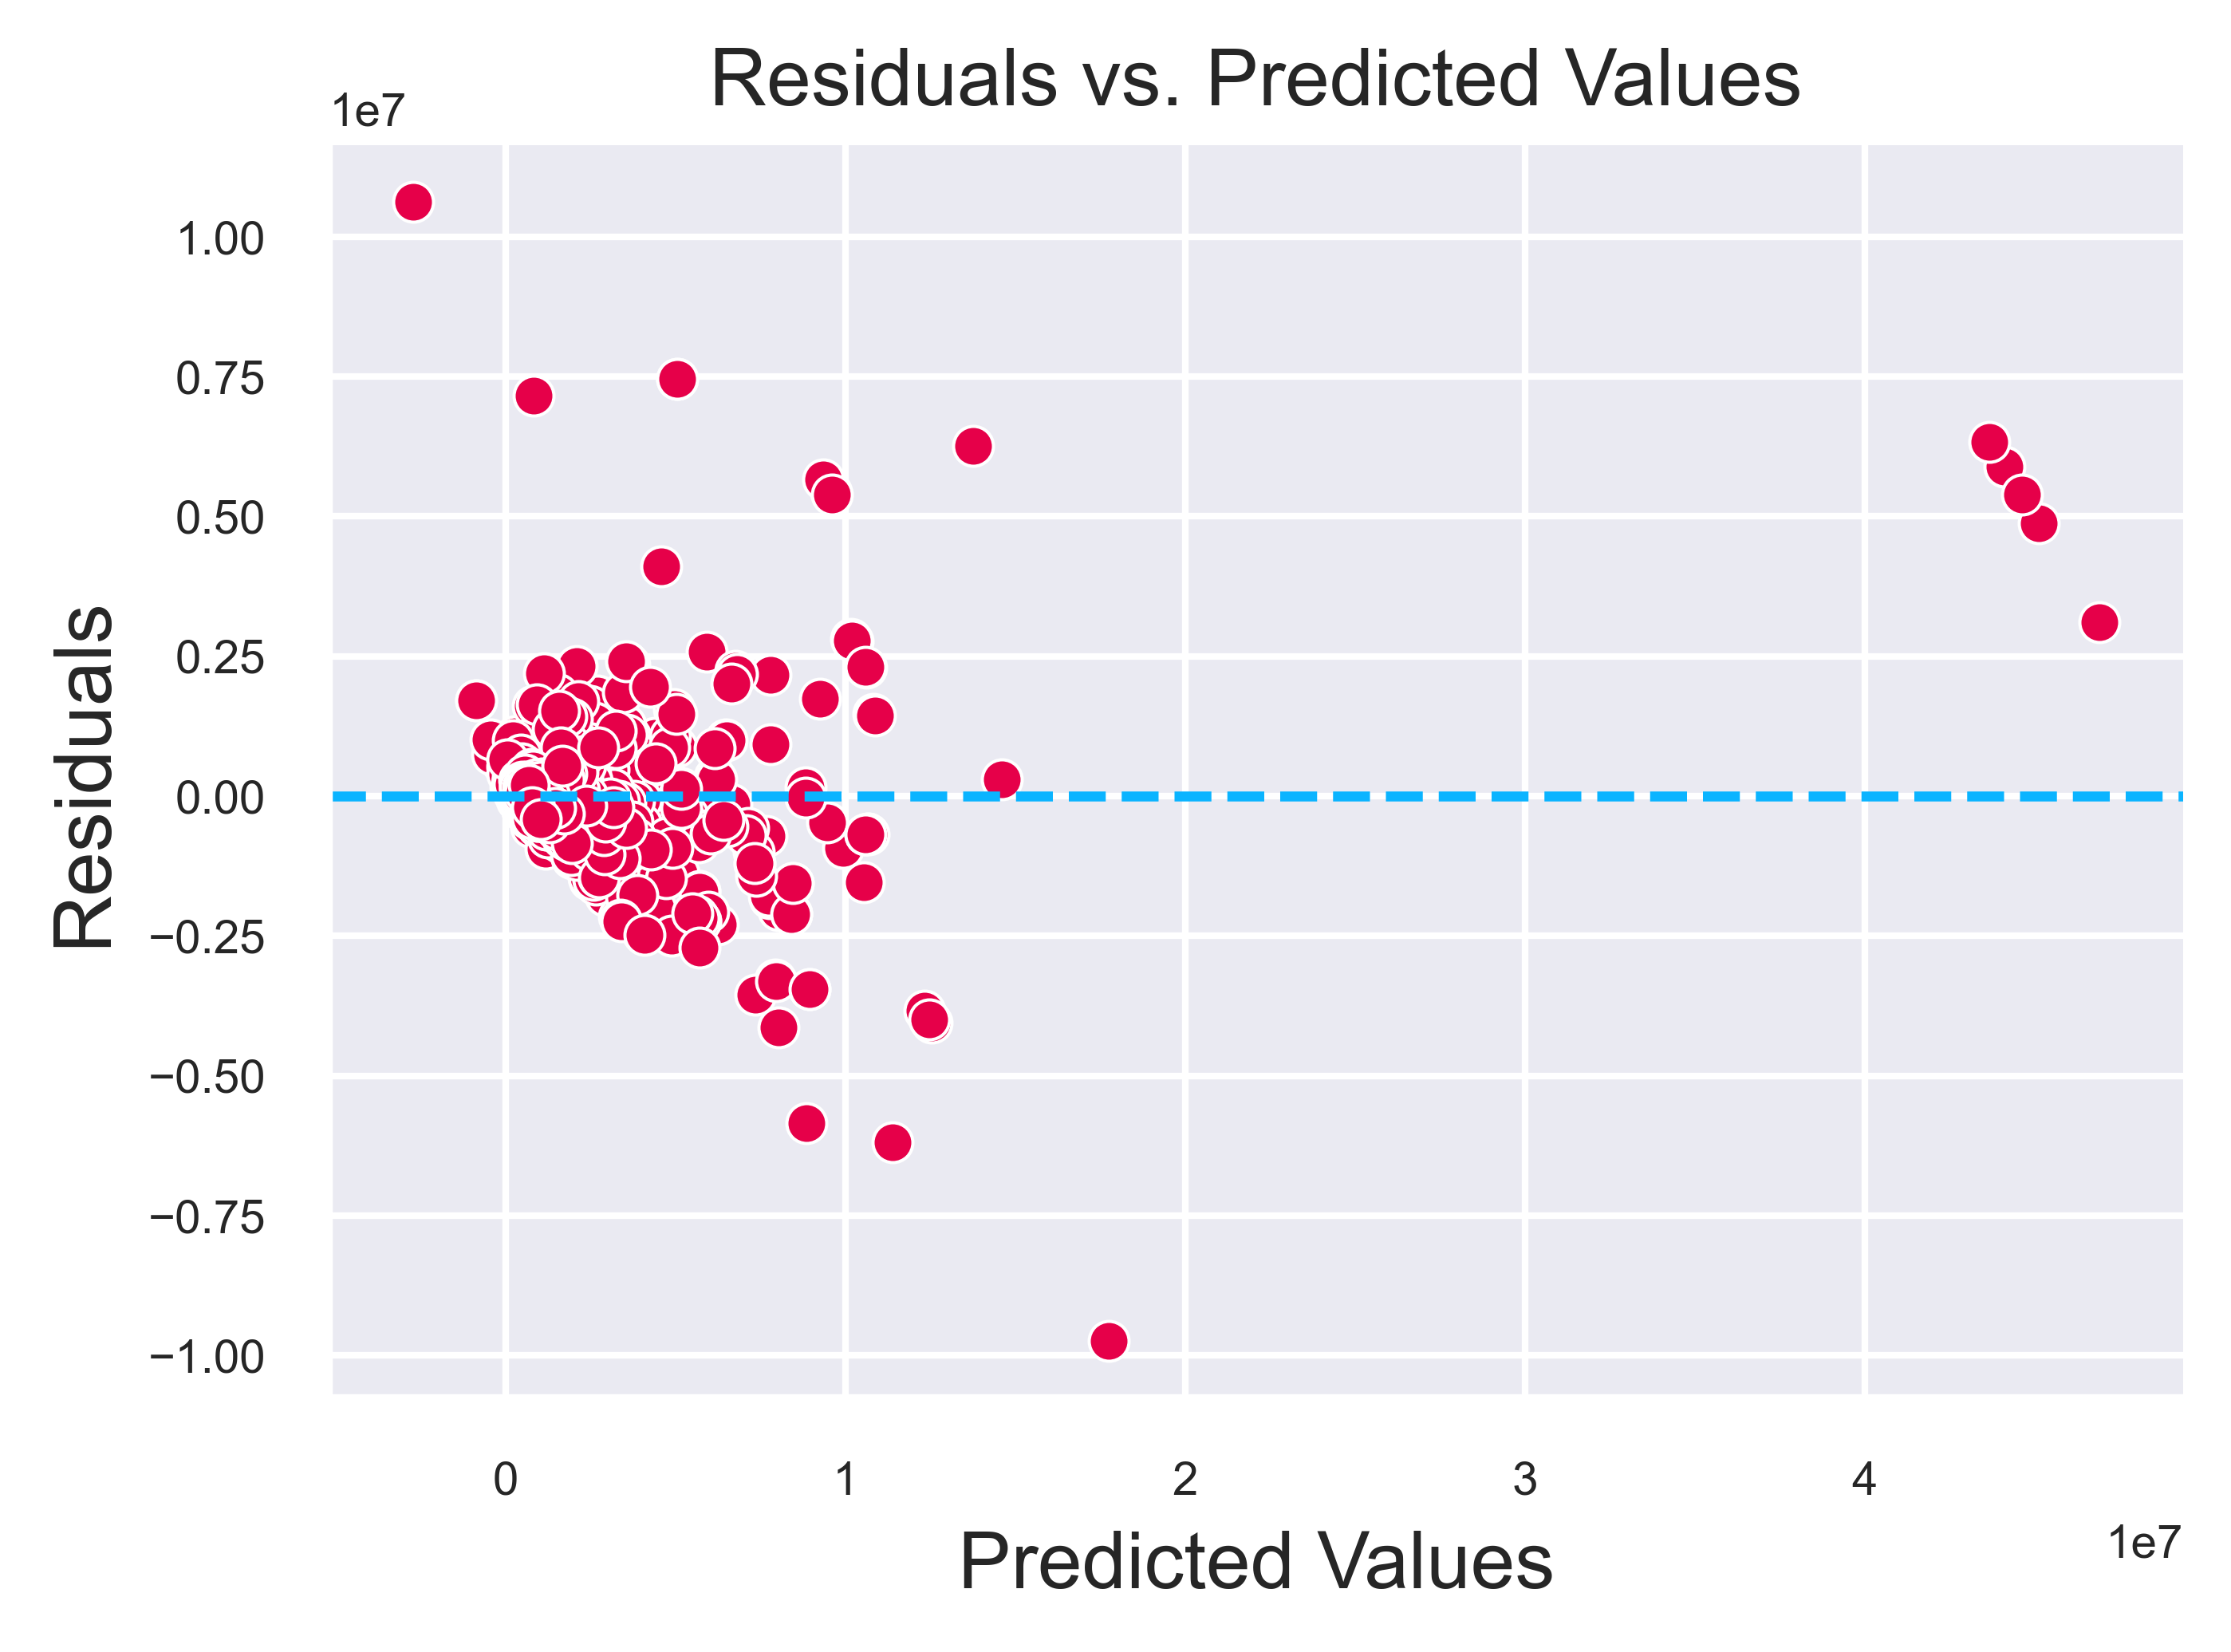

In [110]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');

## Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train);

RandomForestRegressor()

In [112]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 242967.21513612726
MSE: 284611749386.96405
RMSE: 533490.1586598989
R²: 0.9160205704780309


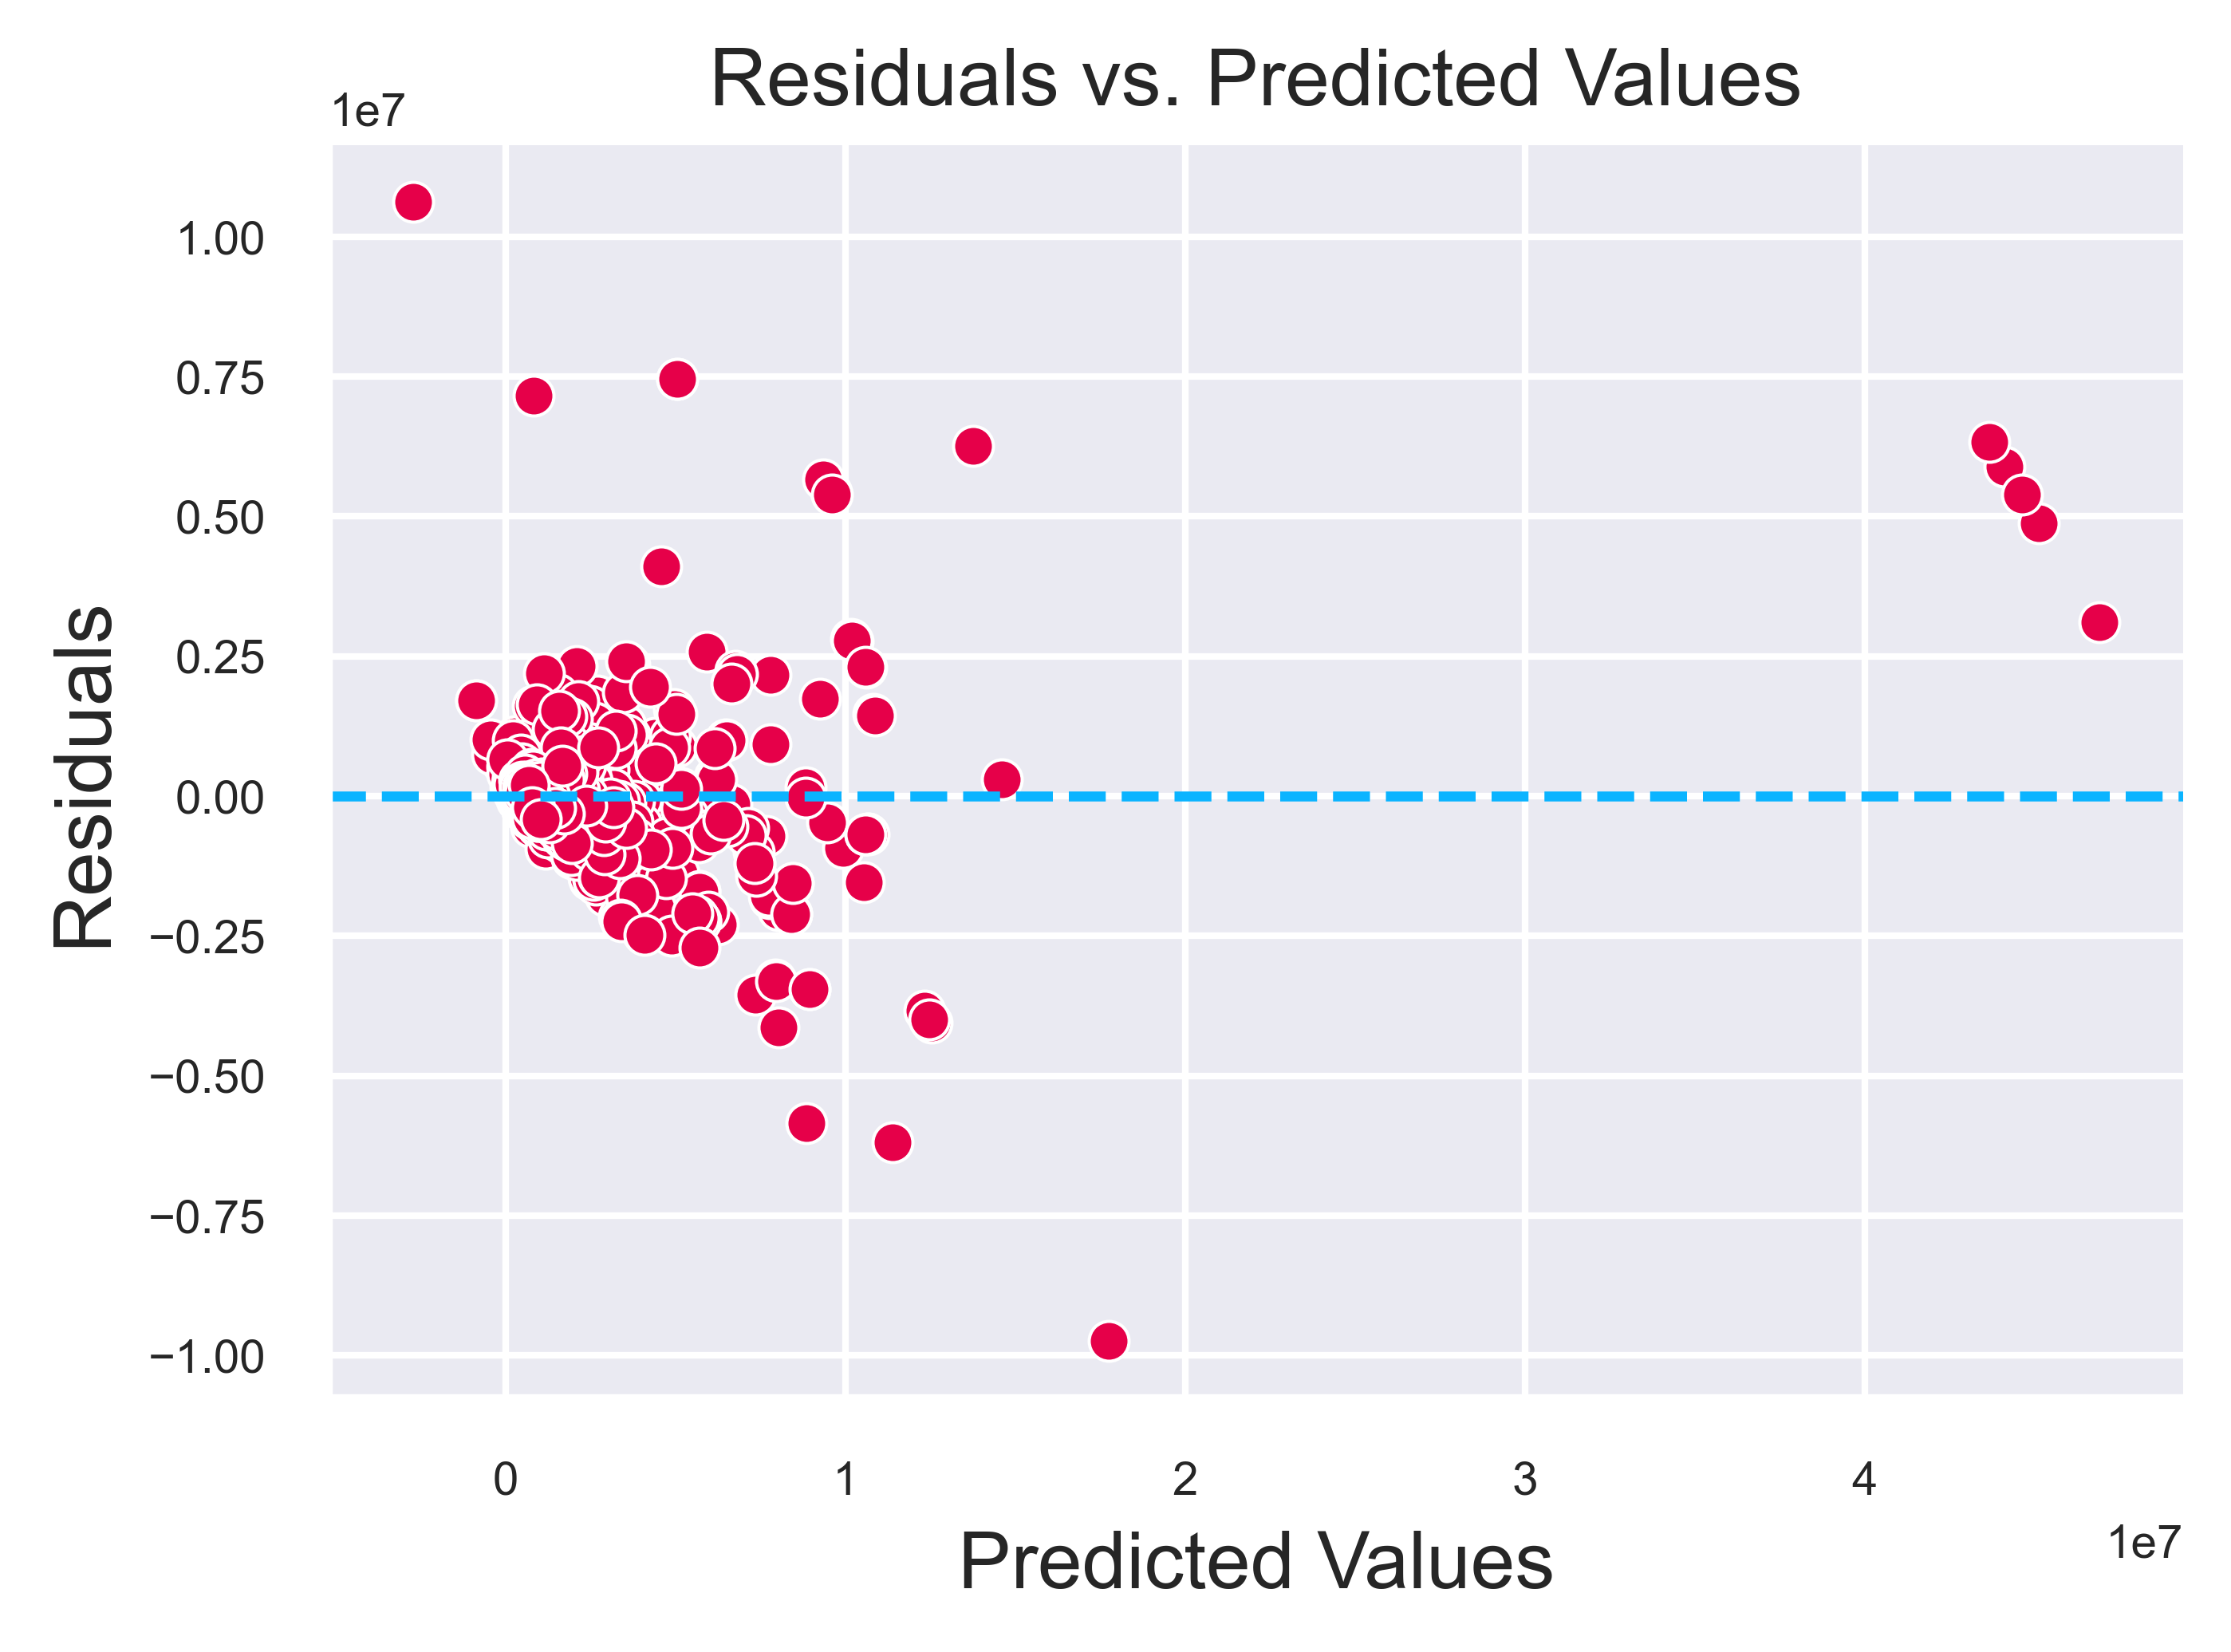

In [113]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="#0bb4ff", linestyle='--')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.title('Residuals vs. Predicted Values');